## Preparation

### Import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import datetime # for tensorboard
from sklearn.model_selection import train_test_split
from tensorflow import keras

import pandas as pd
import seaborn as sns
from keras import backend as K

import time

import matplotlib.animation
plt.rcParams["animation.html"] = "jshtml"

import os.path
from tensorflow.keras.models import load_model

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display multiple outputs

from IPython.display import Image

from tensorflow.keras.callbacks import TensorBoard # Import TensorBoard

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### The data

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
# also want a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,  
                                                    test_size = 0.2, random_state = 42)

In [6]:
mnist; print();
x_train.shape; print();
x_val.shape; print();
x_test.shape; print();
y_train.shape; print();
y_val.shape; print();
y_test.shape

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

(48000, 28, 28)

(12000, 28, 28)

(10000, 28, 28)

(48000,)

(12000,)

(10000,)

In [7]:
tf.convert_to_tensor(x_train)

<tf.Tensor: shape=(48000, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [8]:
tf.convert_to_tensor(y_train)

<tf.Tensor: shape=(48000,), dtype=uint8, numpy=array([5, 0, 1, ..., 0, 0, 4], dtype=uint8)>

In [9]:
x_train_subset = x_train[0:5000,:,:]
x_train_subset_flat = x_train_subset.flatten().reshape(5000, 784)

y_train_subset = y_train[0:5000]

### Load models

In [10]:
model_D8 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_D8')
model_D128 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_D128')
model_overfit = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_overfit')
model3 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model3')
model4 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model4')
model5 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5')
model5a = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5a')
model5b = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5b')
model5c = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5c')
model6 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model6')
model7 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model7')

## Visualising Intermediate Activations

### Visualising Intermediate Activations of a CNN 

https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8

In [11]:
input_model5 = model5.input 
outputs_model5 = [layer.output for layer in model5.layers] 
functors_model5 = K.function([model5.input], outputs_model5) 

In [ ]:
# model5.input # KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'input_1')
# outputs_model5
# [<KerasTensor: shape=(None, 26, 26, 24) dtype=float32 (created by layer 'conv2d')>,
#  <KerasTensor: shape=(None, 13, 13, 24) dtype=float32 (created by layer 'max_pooling2d')>,
#  <KerasTensor: shape=(None, 11, 11, 64) dtype=float32 (created by layer 'conv2d_1')>,
#  <KerasTensor: shape=(None, 5, 5, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
#  <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'flatten')>,
#  <KerasTensor: shape=(None, 1600) dtype=float32 (created by layer 'dropout')>,
#  <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense')>]

Choose a random image from the dataset to visualise activations.

(-0.5, 27.5, 27.5, -0.5)

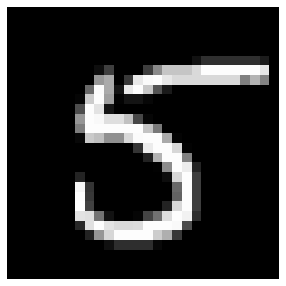

In [15]:
im = x_train[0].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(im[0,:,:,0],cmap="gray")
plt.axis('off')

Output activations from the selected layers.

In [16]:
imactivations_model5 = functors_model5(im) 
# imactivations_model5

This extracts the outputs generated by each individual neuron and for the frame above and stores them on a per-layer basis. 

In [17]:
model5.layers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'conv2d')

<Figure size 1152x144 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d')

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'conv2d_1')

<Figure size 1152x288 with 0 Axes>

Text(0.5, 1.0, 'max_pooling2d_1')

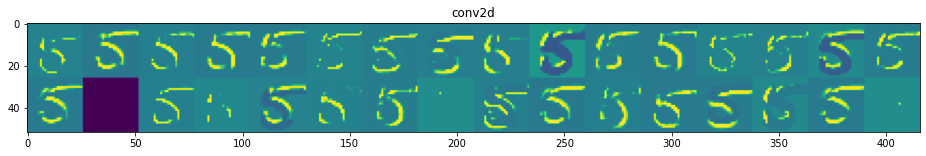

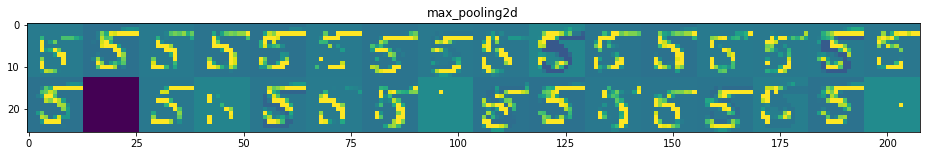

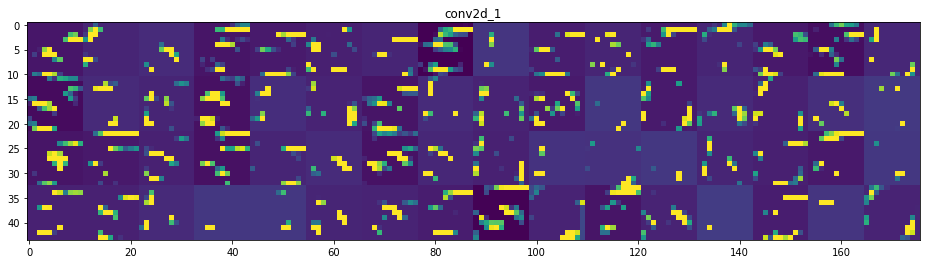

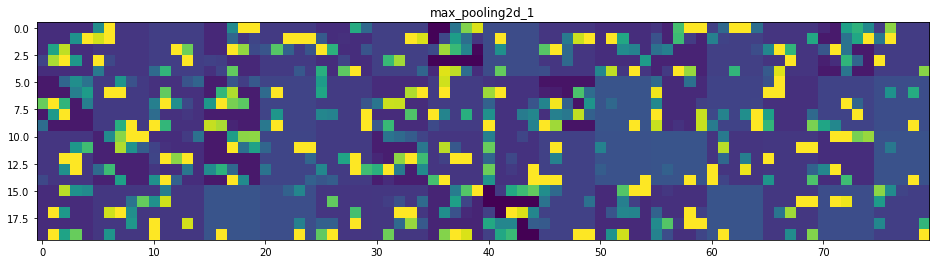

In [18]:
layer_names = []
for layer in model5.layers[0:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, imactivations_model5): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

This first layer retains almost the full shape of the image, and most of the information in the image. 

Deeper in the network, the activations become more complex and abstract. It starts encoding high-level features such as edges, curves and angles.

As we go deeper in the model, wsome of the filters are not getting activated, which shows the model is reaching it’s learning capacity.

### Visualise layer outputs of your Keras classifier with Keract

https://www.machinecurve.com/index.php/2019/12/02/visualize-layer-outputs-of-your-keras-classifier-with-keract/

It is a set of simple yet powerful tools to visualize the outputs (and gradients if desired) of every layer of your Keras model.

In [19]:
!pip install keract

input_1 (1, 28, 28) 


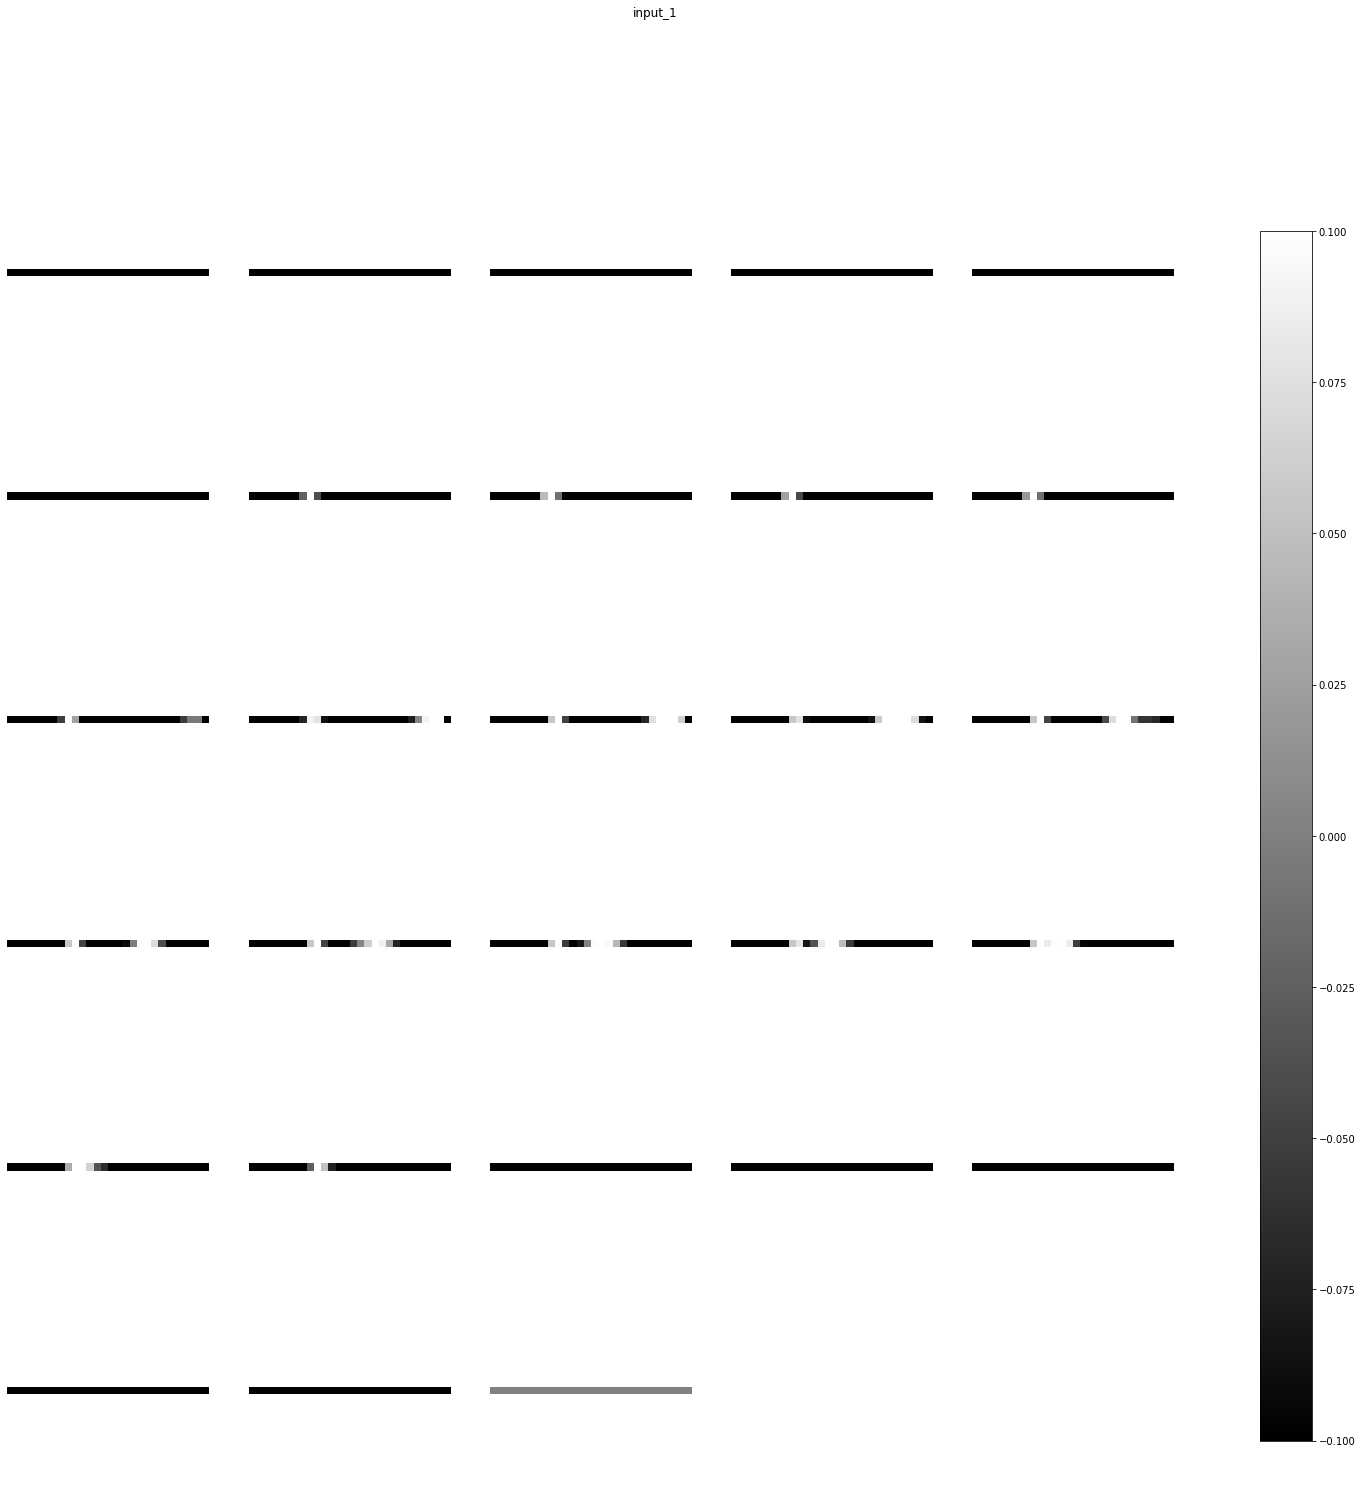

conv2d (1, 26, 26, 32) 


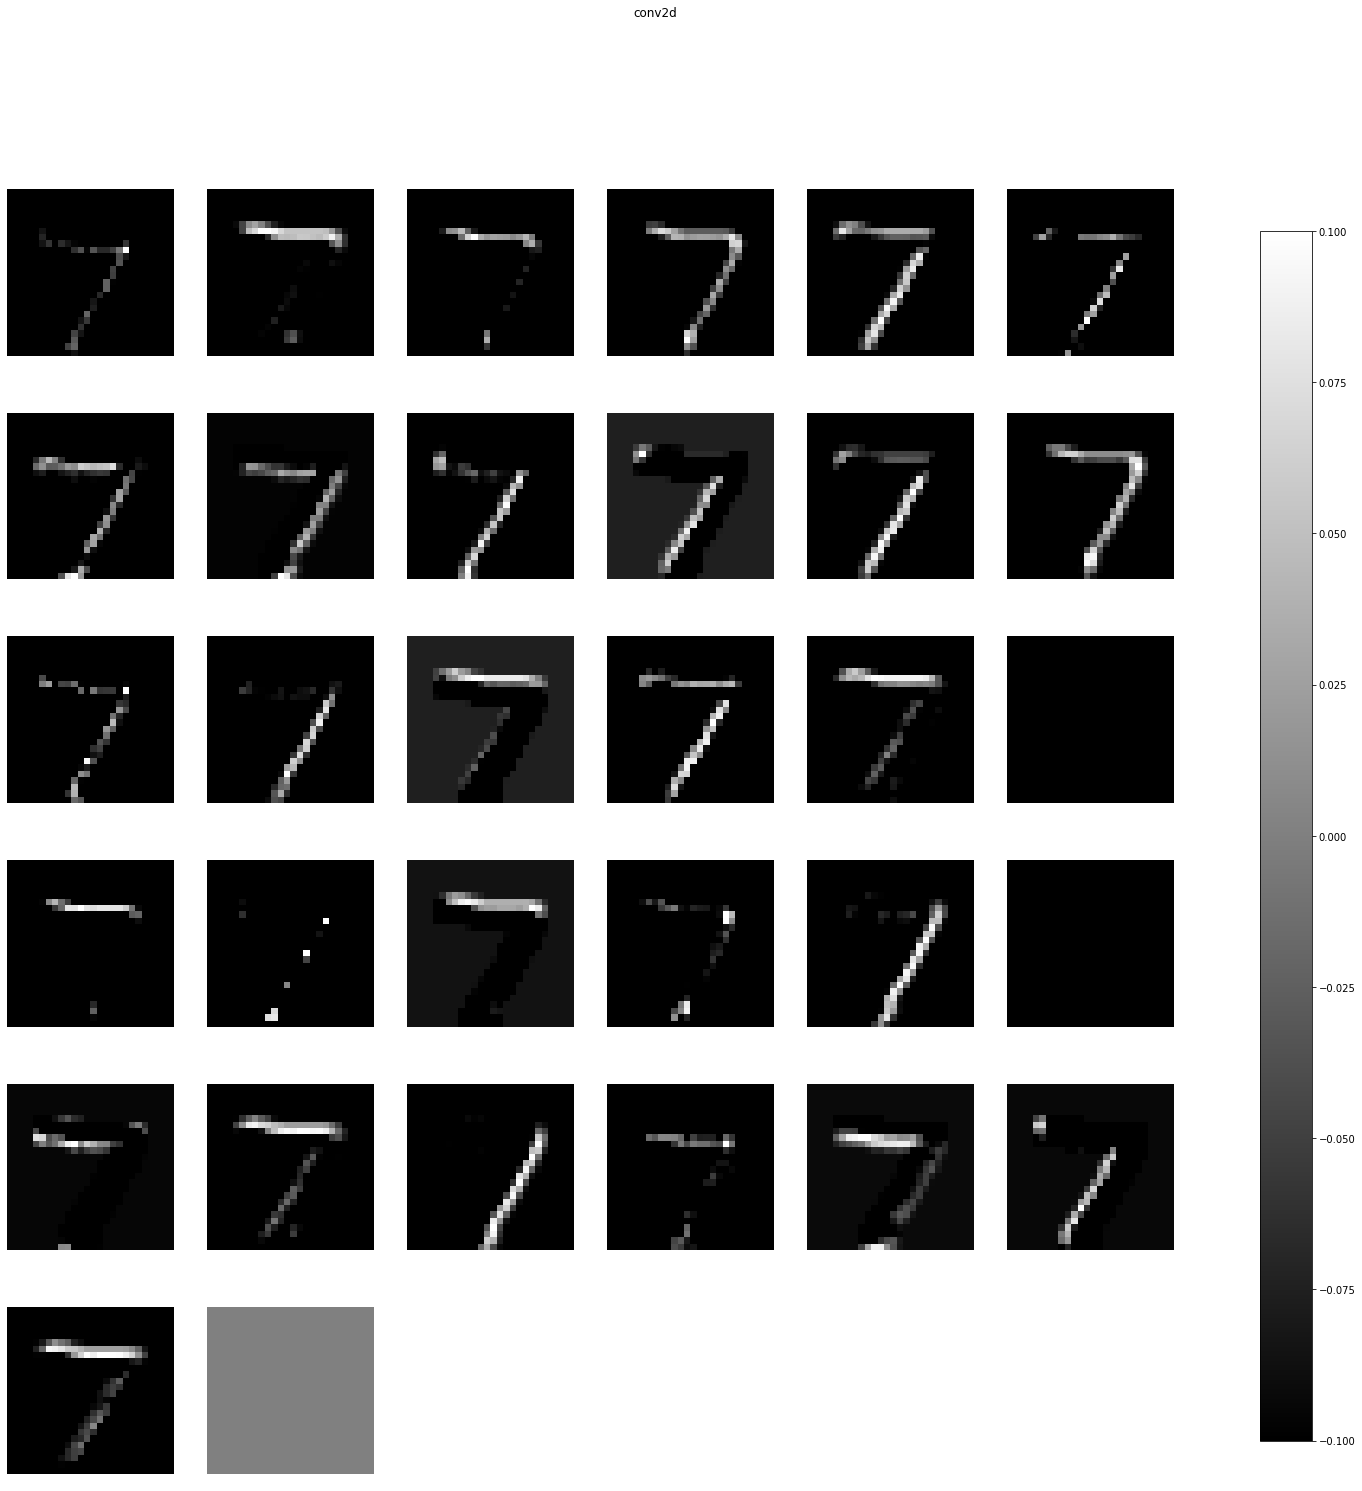

max_pooling2d (1, 13, 13, 32) 


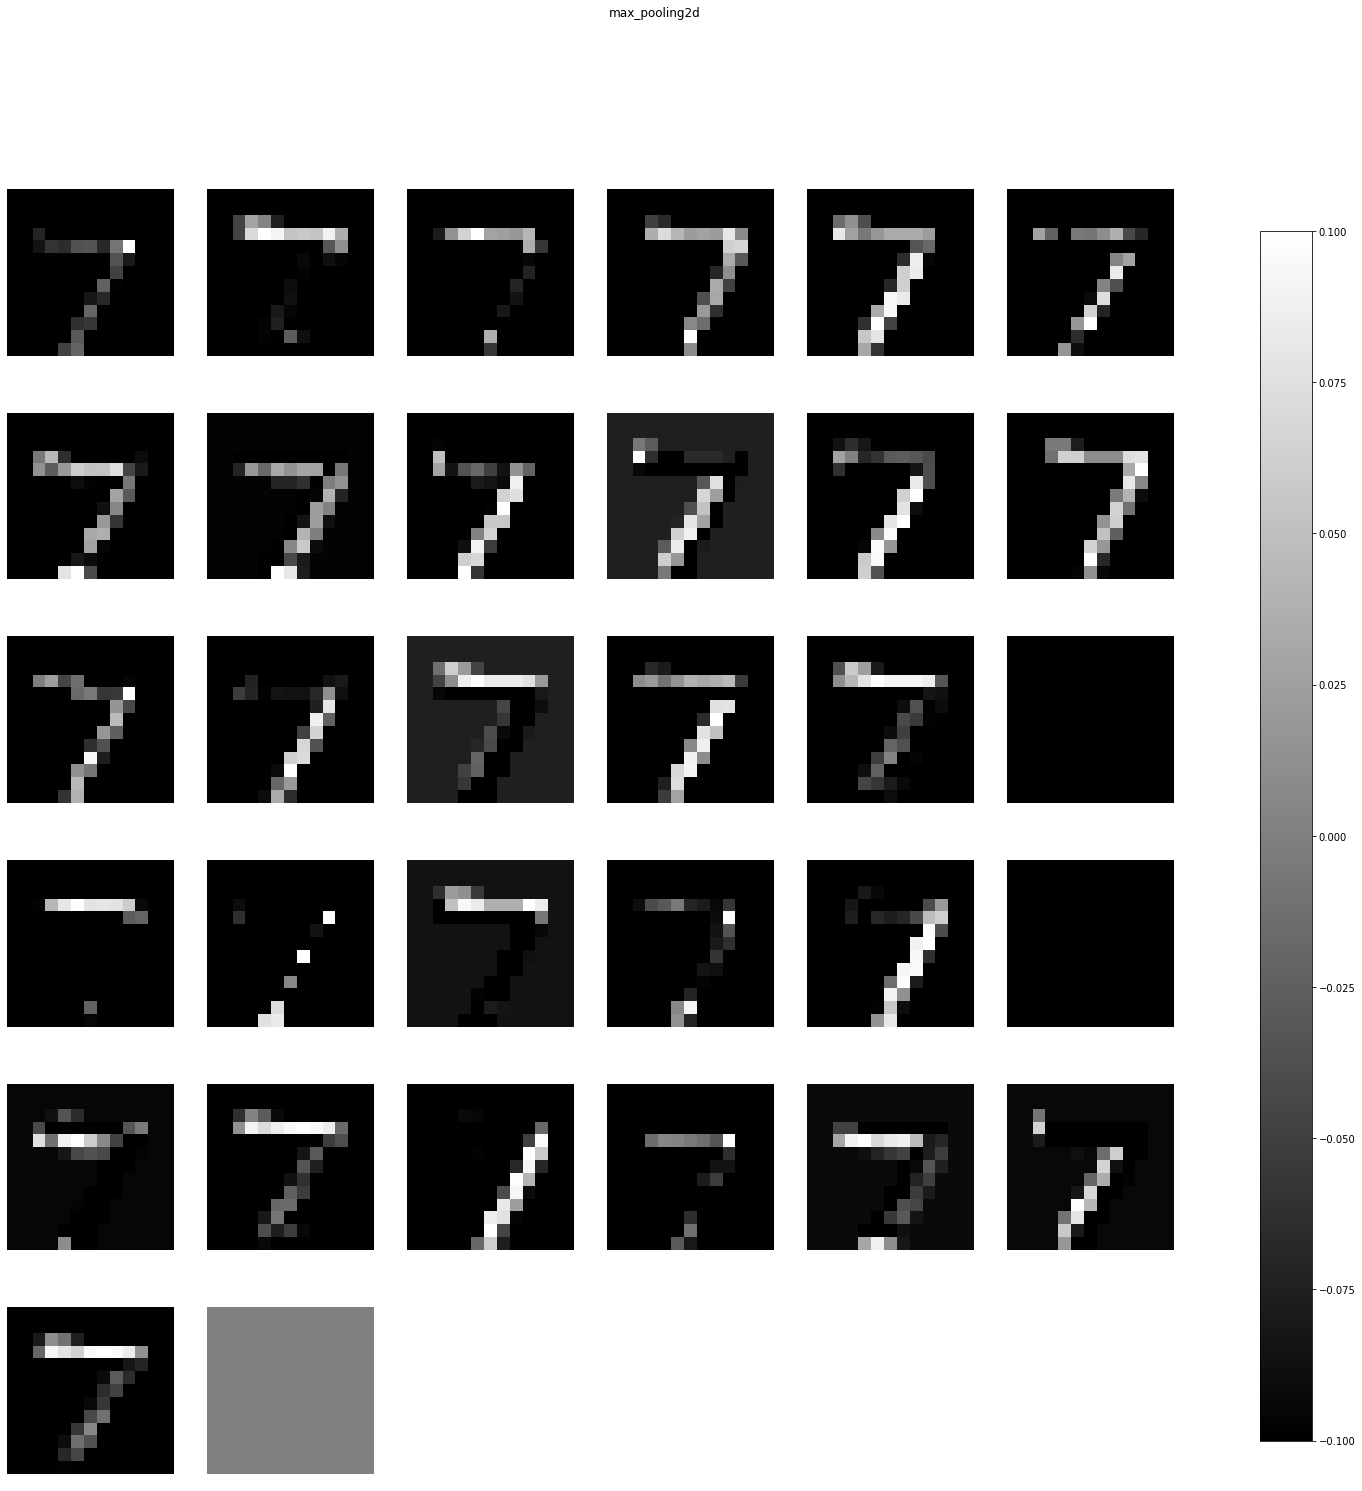

conv2d_1 (1, 11, 11, 64) 


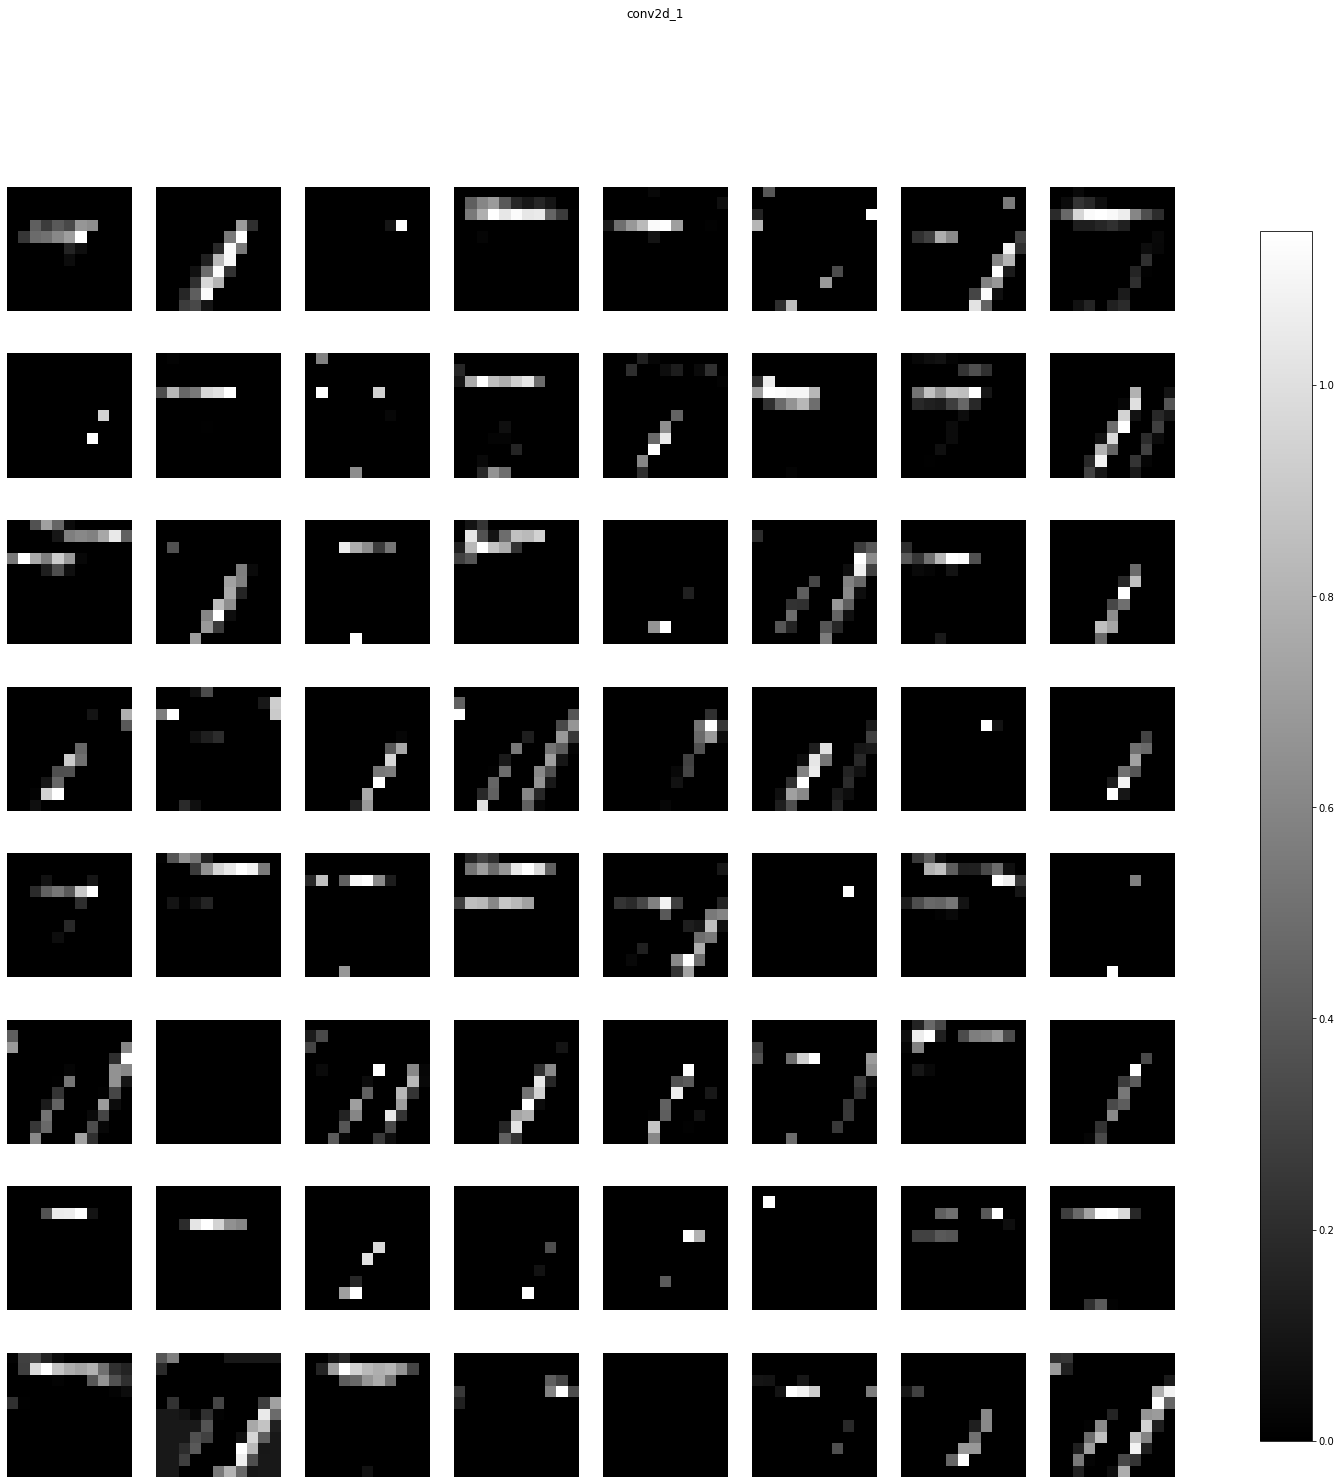

max_pooling2d_1 (1, 5, 5, 64) 


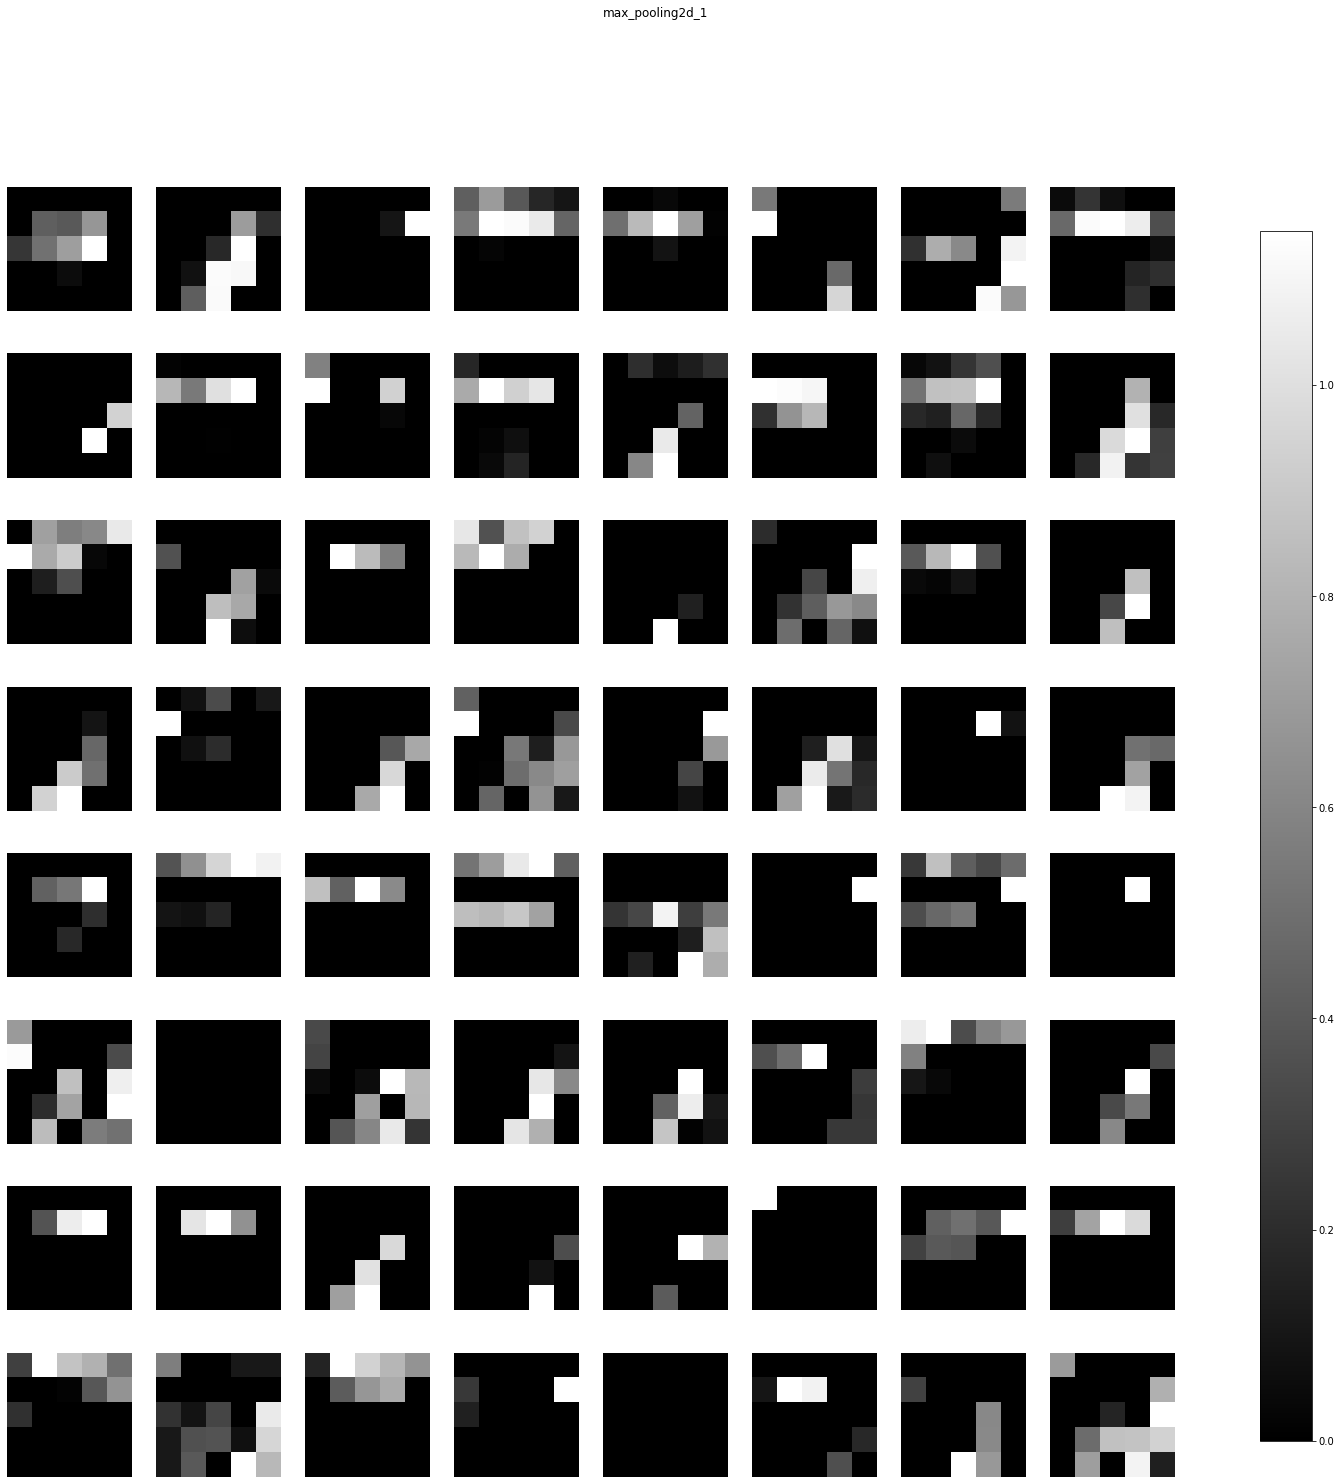

flatten (1, 1600) 


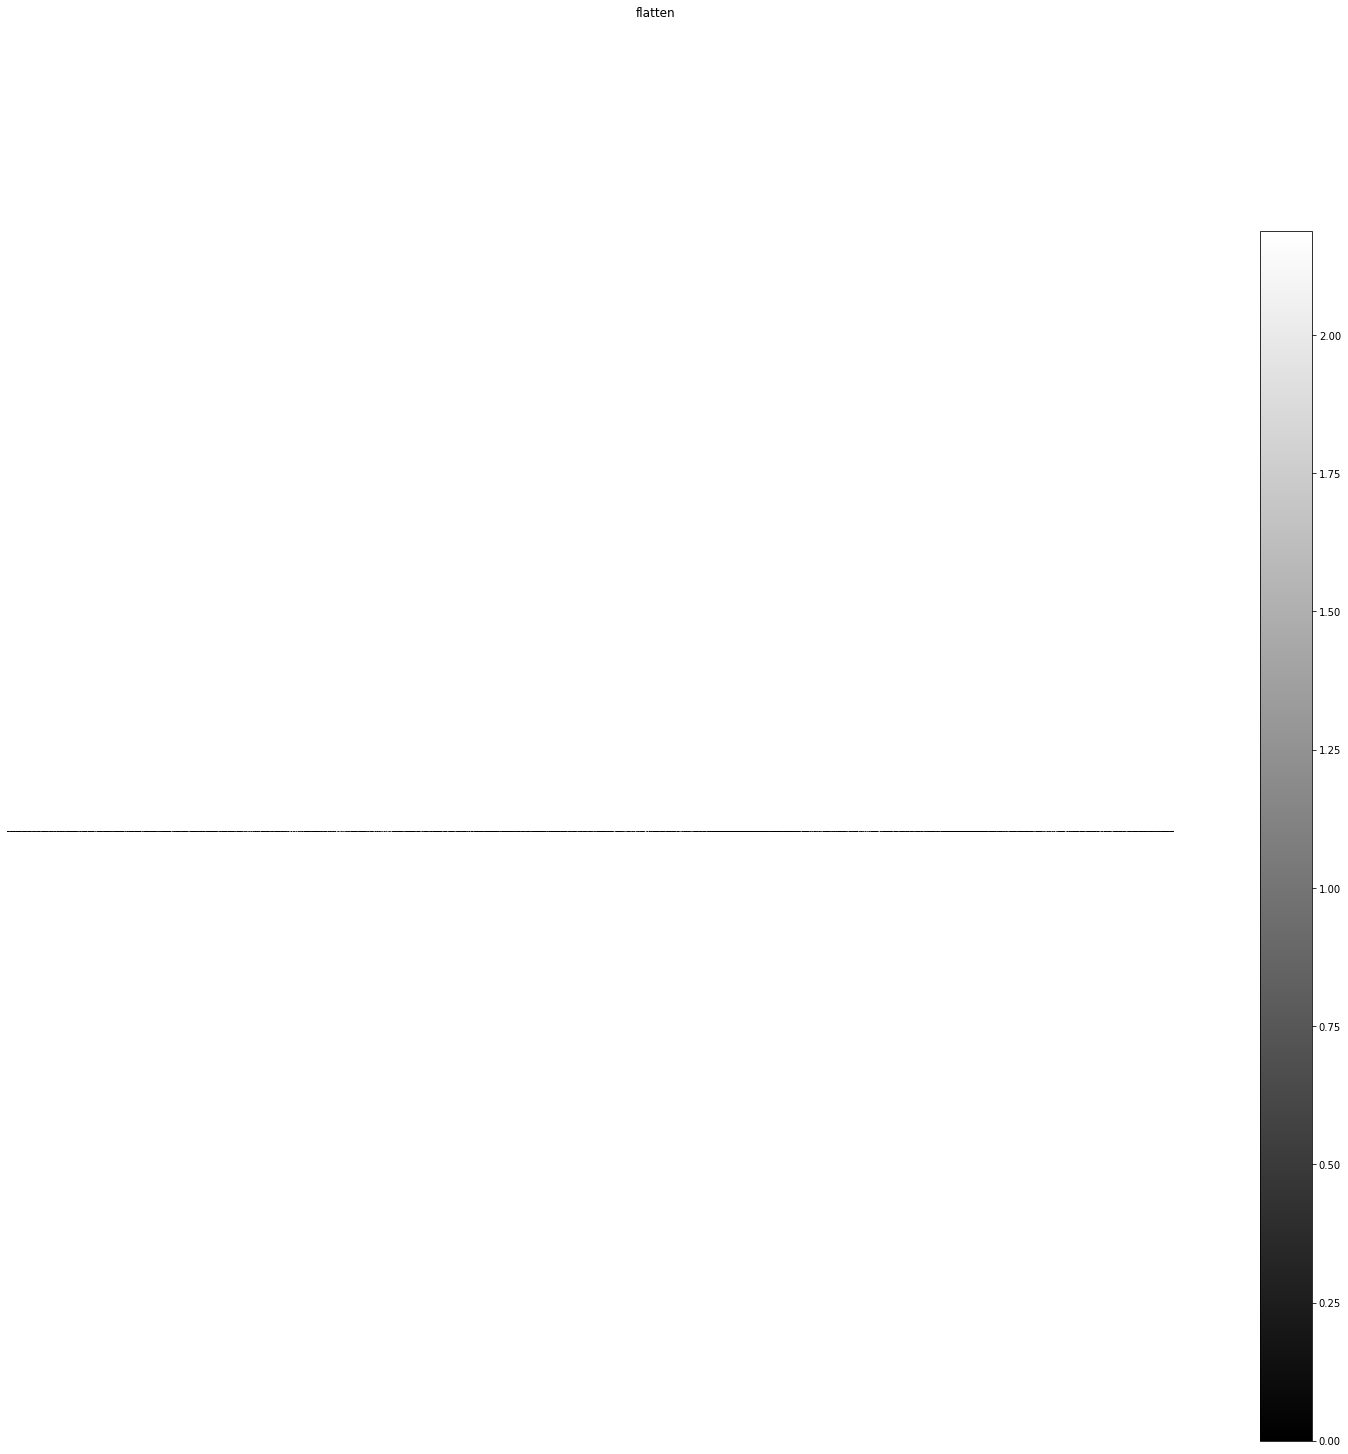

dropout (1, 1600) 


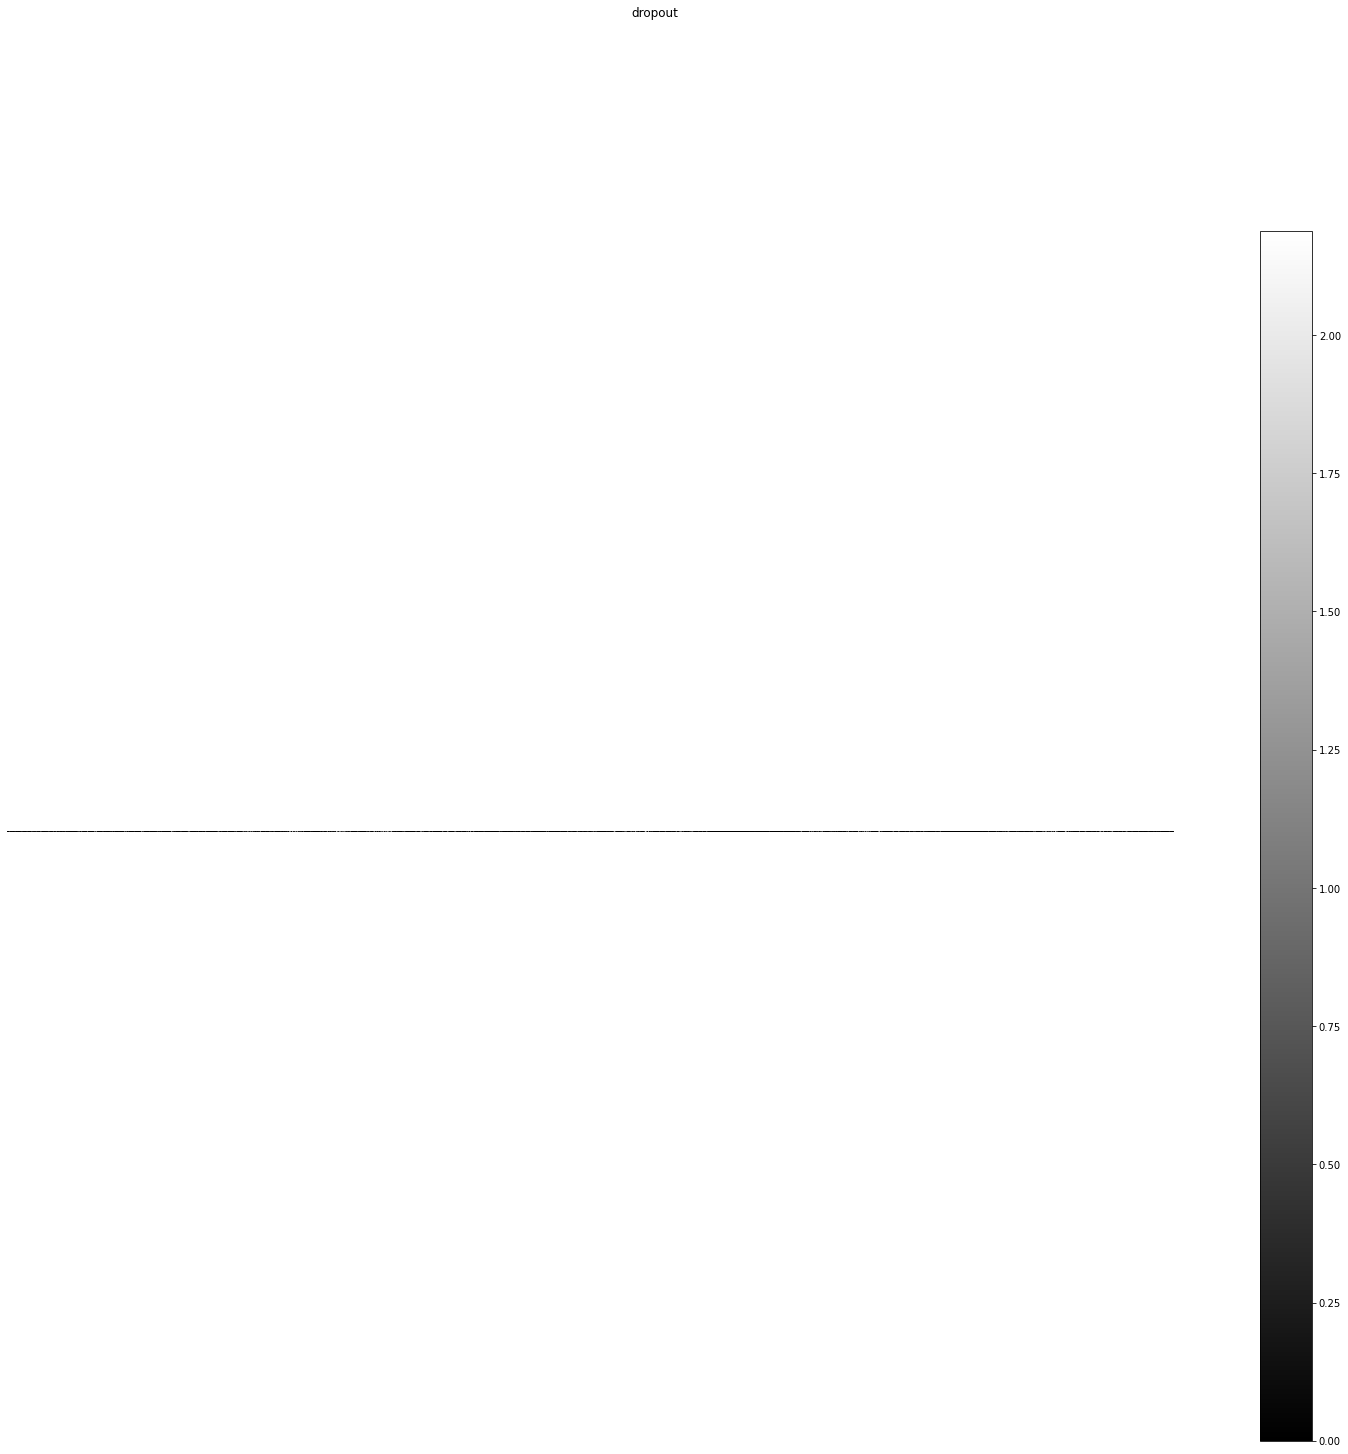

dense (1, 10) 


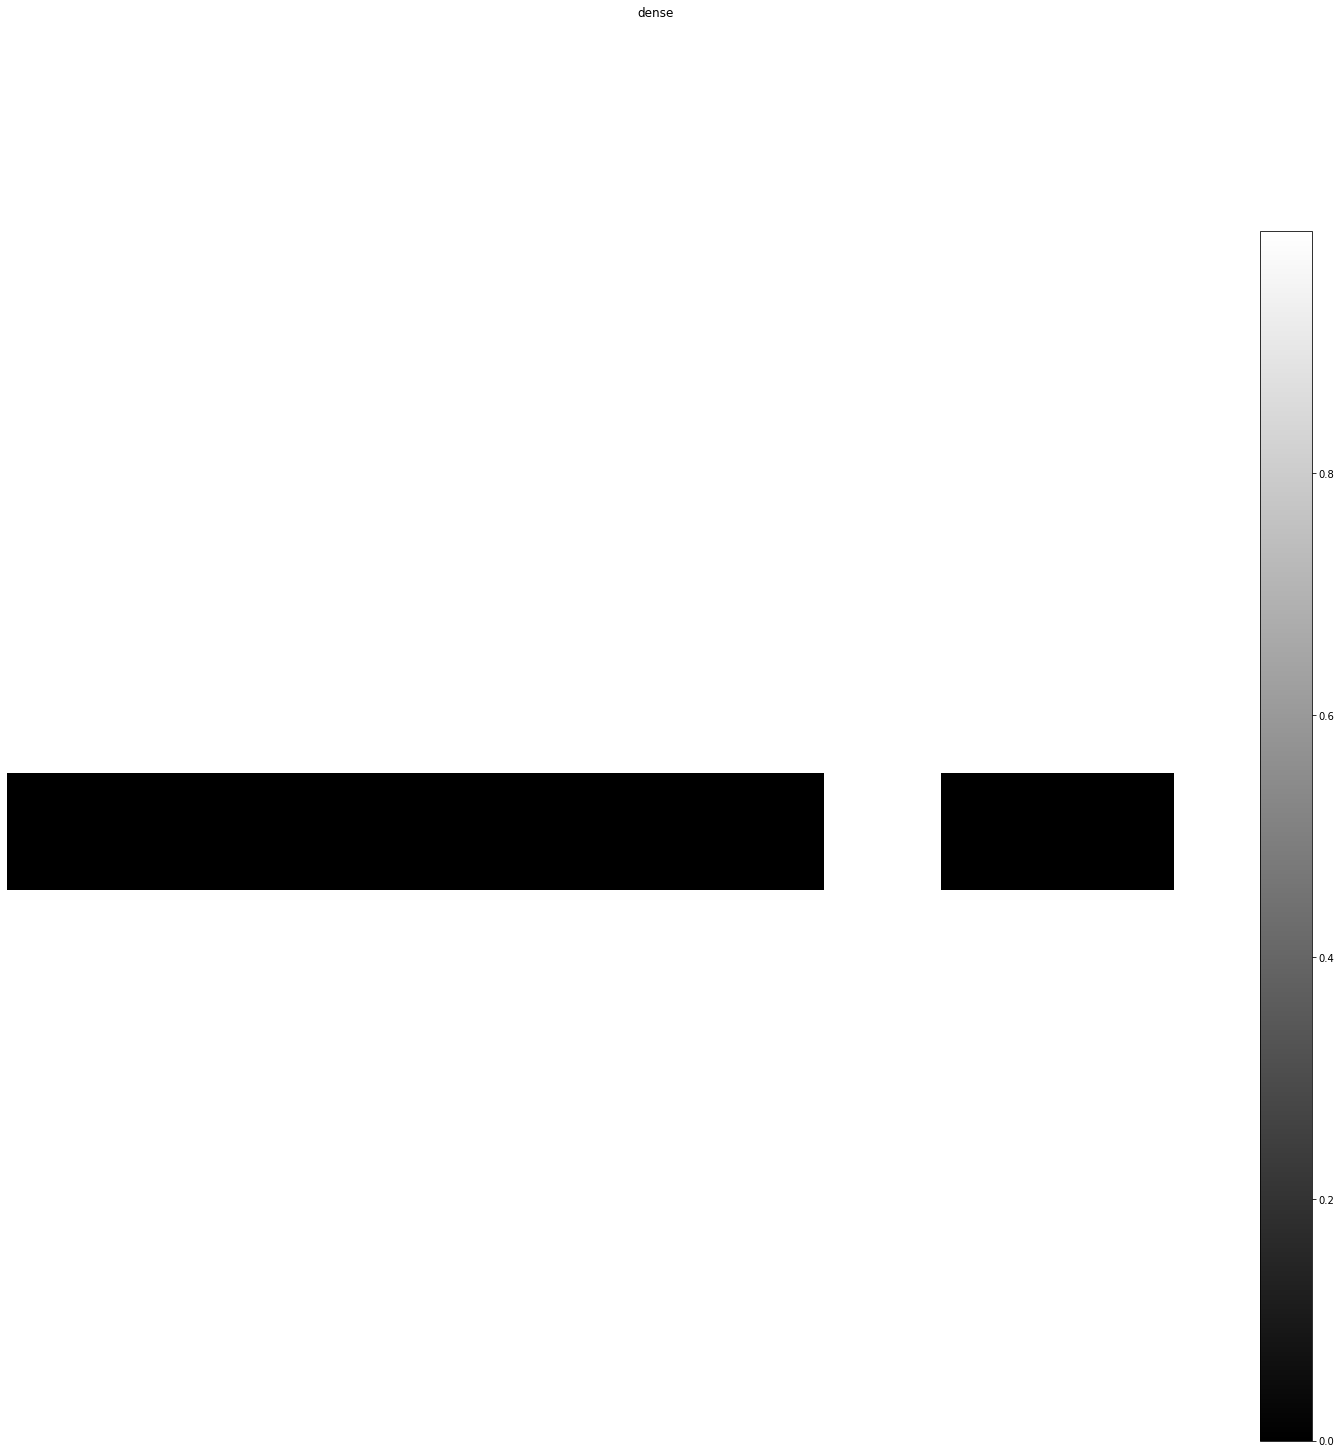

In [20]:
from keract import get_activations, display_activations
keract_inputs = x_test[:1]
keract_targets = y_test[:1]
activations = get_activations(model5, keract_inputs)
display_activations(activations, cmap="gray", save=False)

In [21]:
x_test.shape
x_test1 = x_test.reshape(10000, 28, 28,1)

(10000, 28, 28)

input_1 (1, 28, 28, 1) 


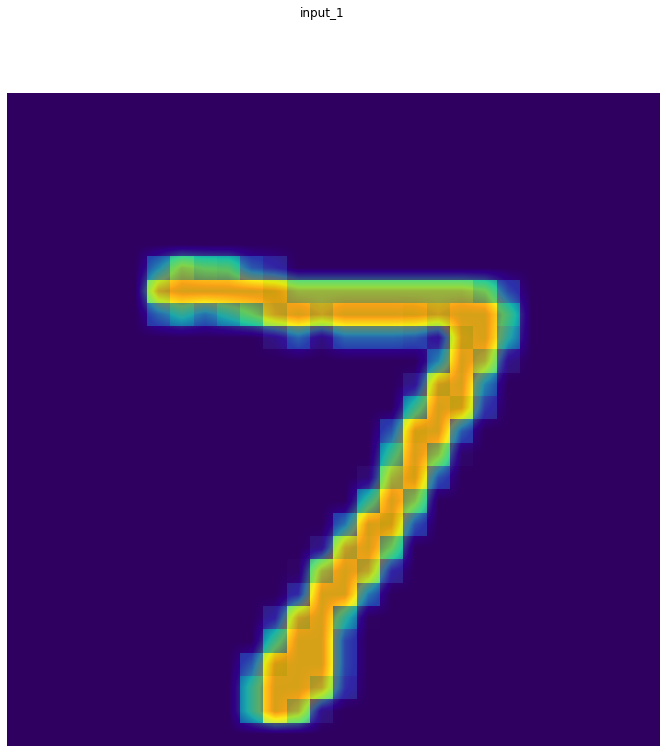

conv2d (1, 26, 26, 32) 


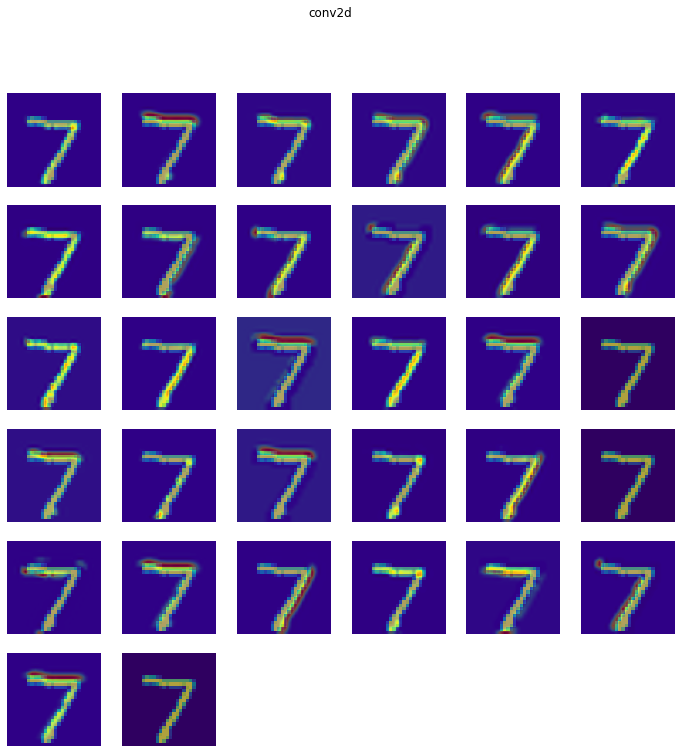

max_pooling2d (1, 13, 13, 32) 


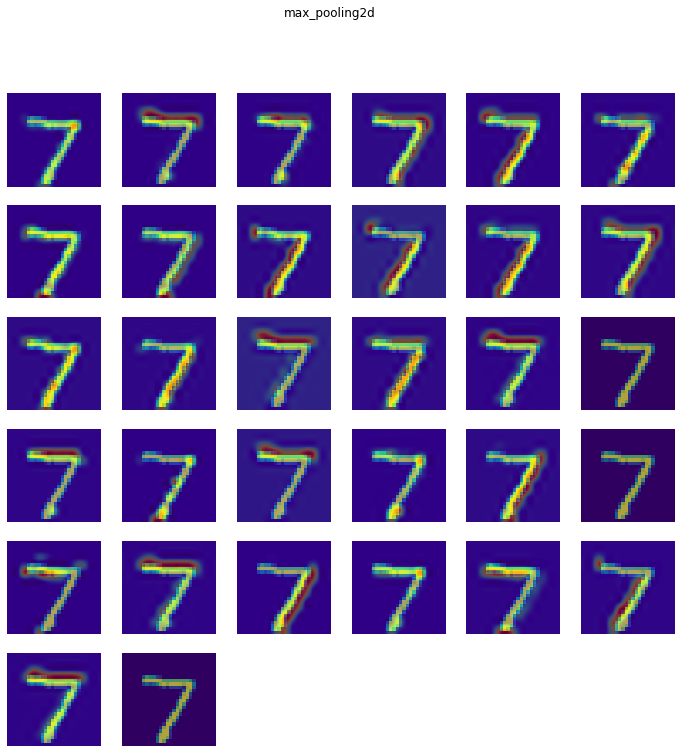

conv2d_1 (1, 11, 11, 64) 


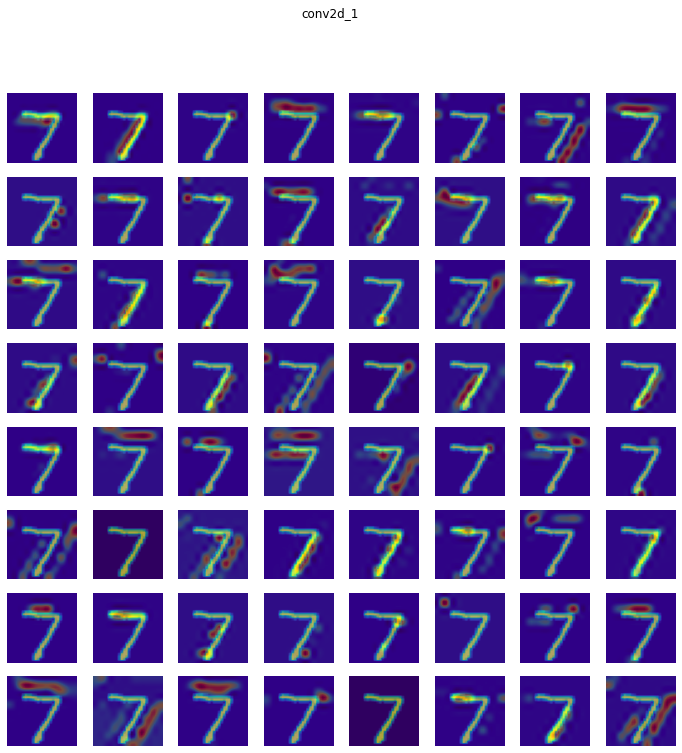

max_pooling2d_1 (1, 5, 5, 64) 


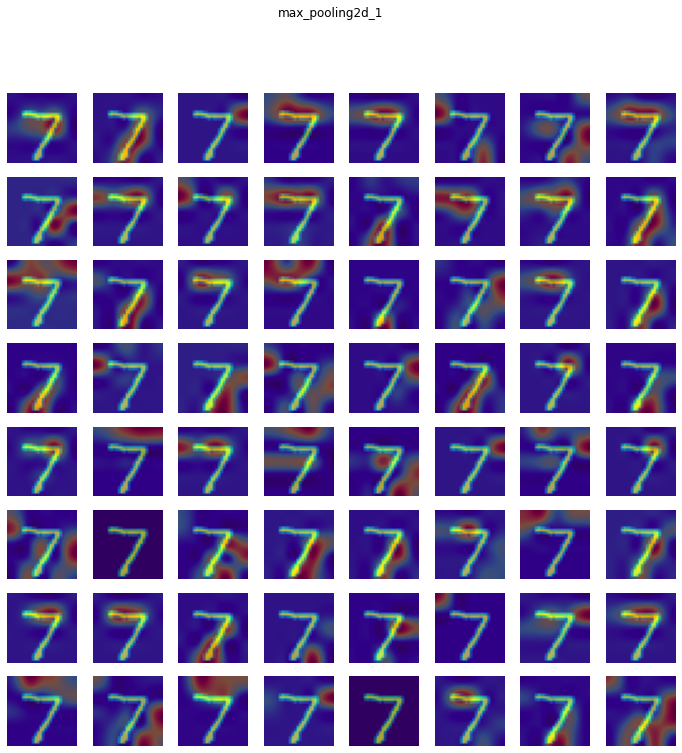

flatten (1, 1600) -> Skipped. 2D Activations.
dropout (1, 1600) -> Skipped. 2D Activations.
dense (1, 10) -> Skipped. 2D Activations.


In [22]:
from keract import get_activations, display_heatmaps
keract_inputs = x_test1[:1]
keract_targets = y_test[:1]
activations = get_activations(model5, keract_inputs)
display_heatmaps(activations, keract_inputs, save=False)

input_1 (1, 28, 28, 1) 


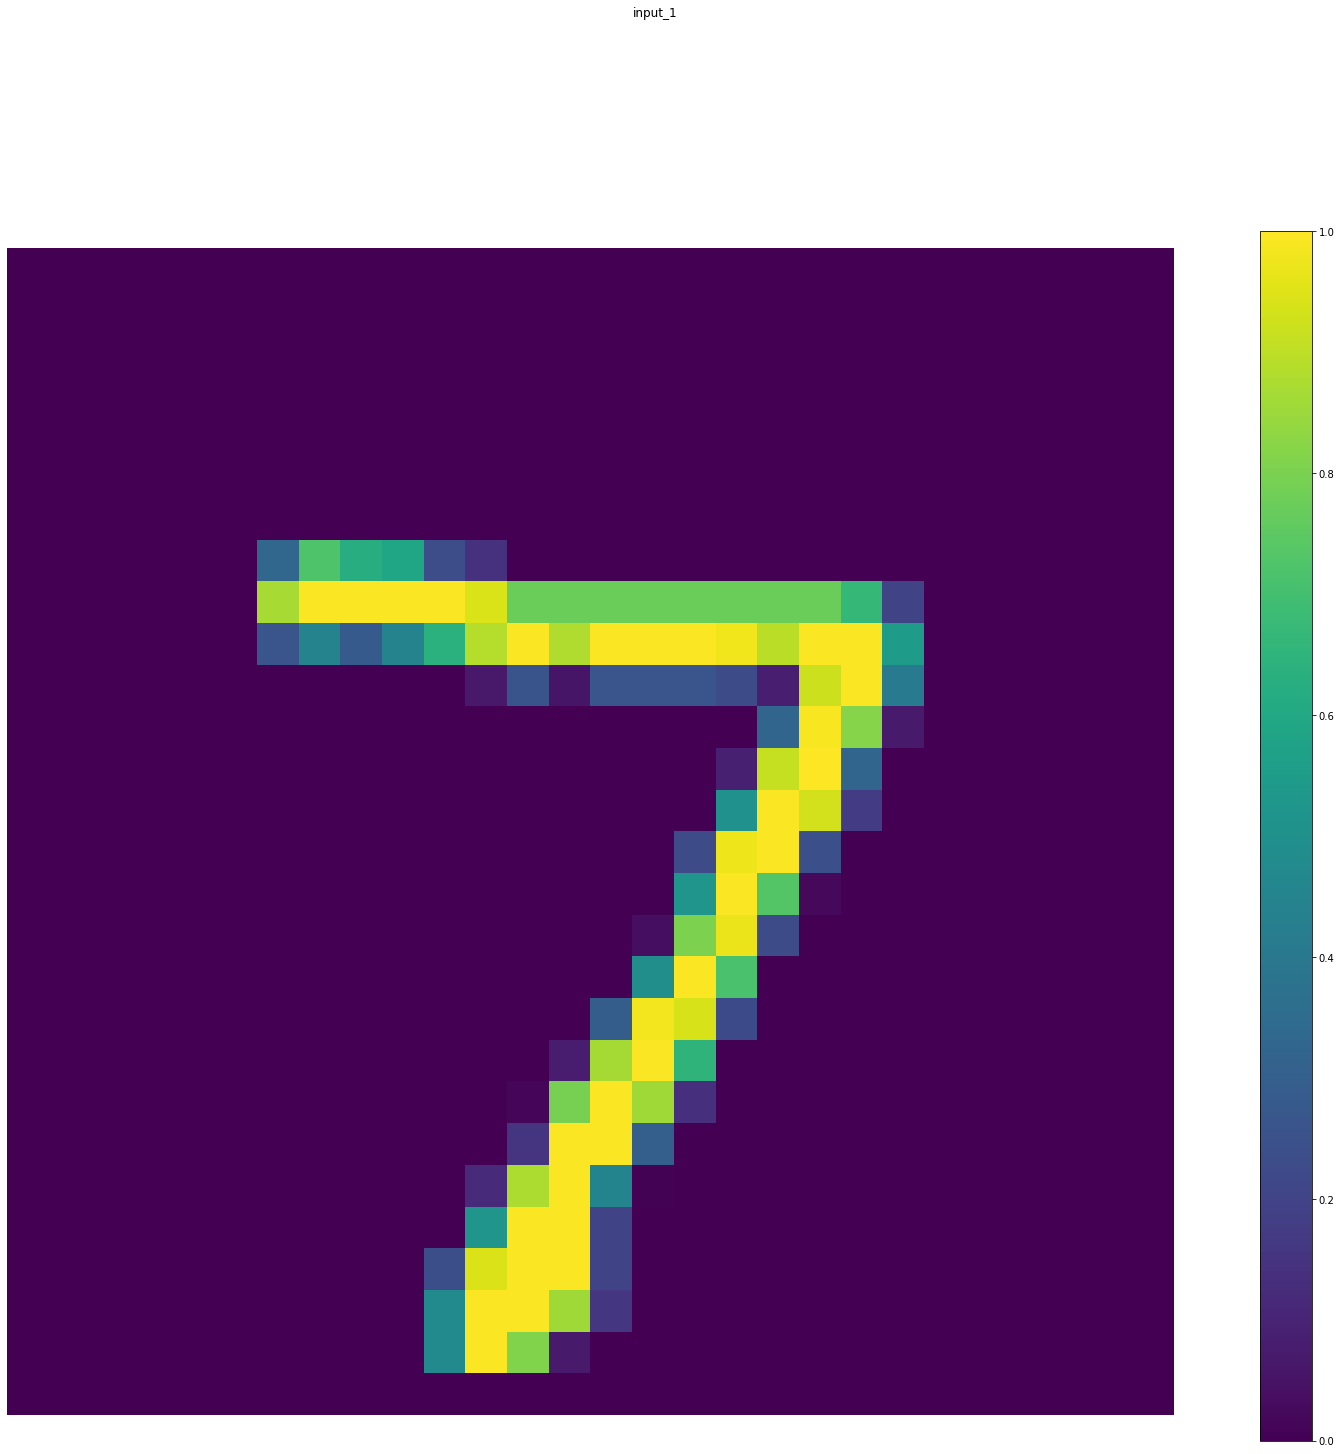

conv2d (1, 26, 26, 32) 


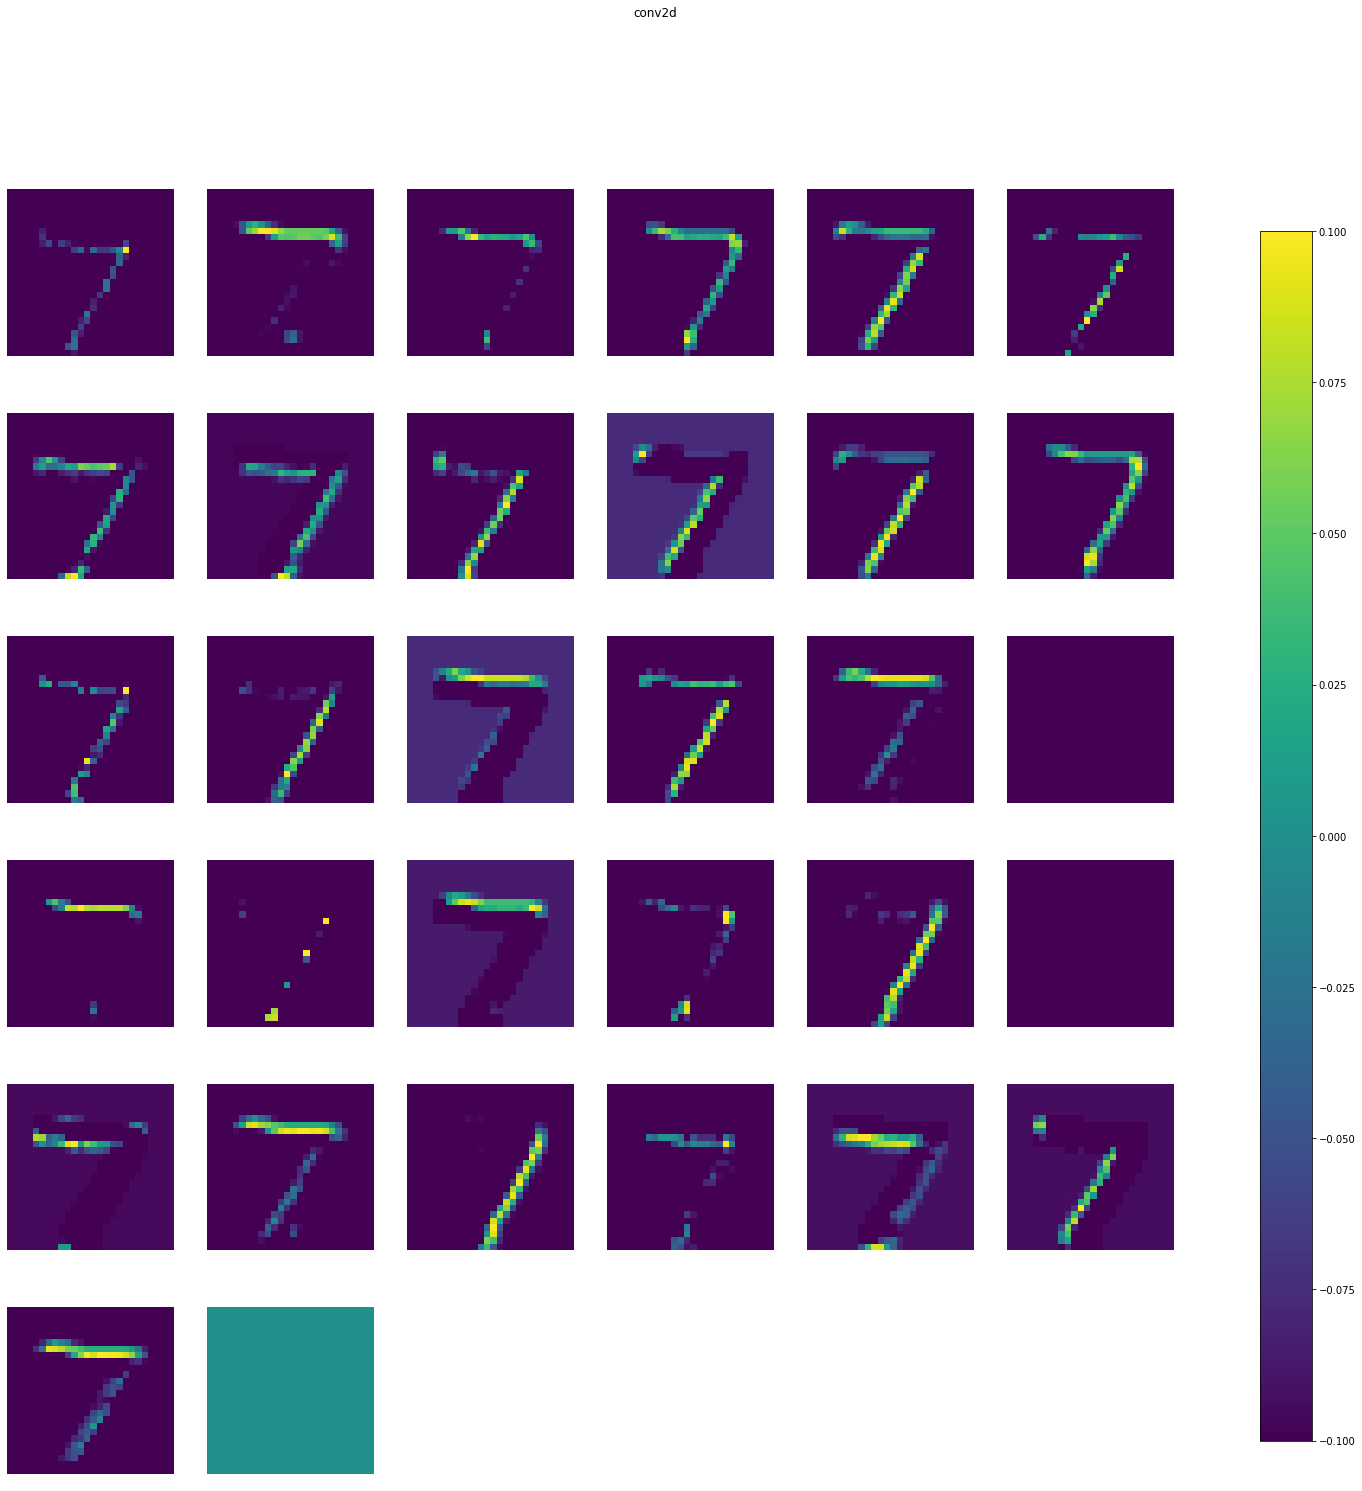

max_pooling2d (1, 13, 13, 32) 


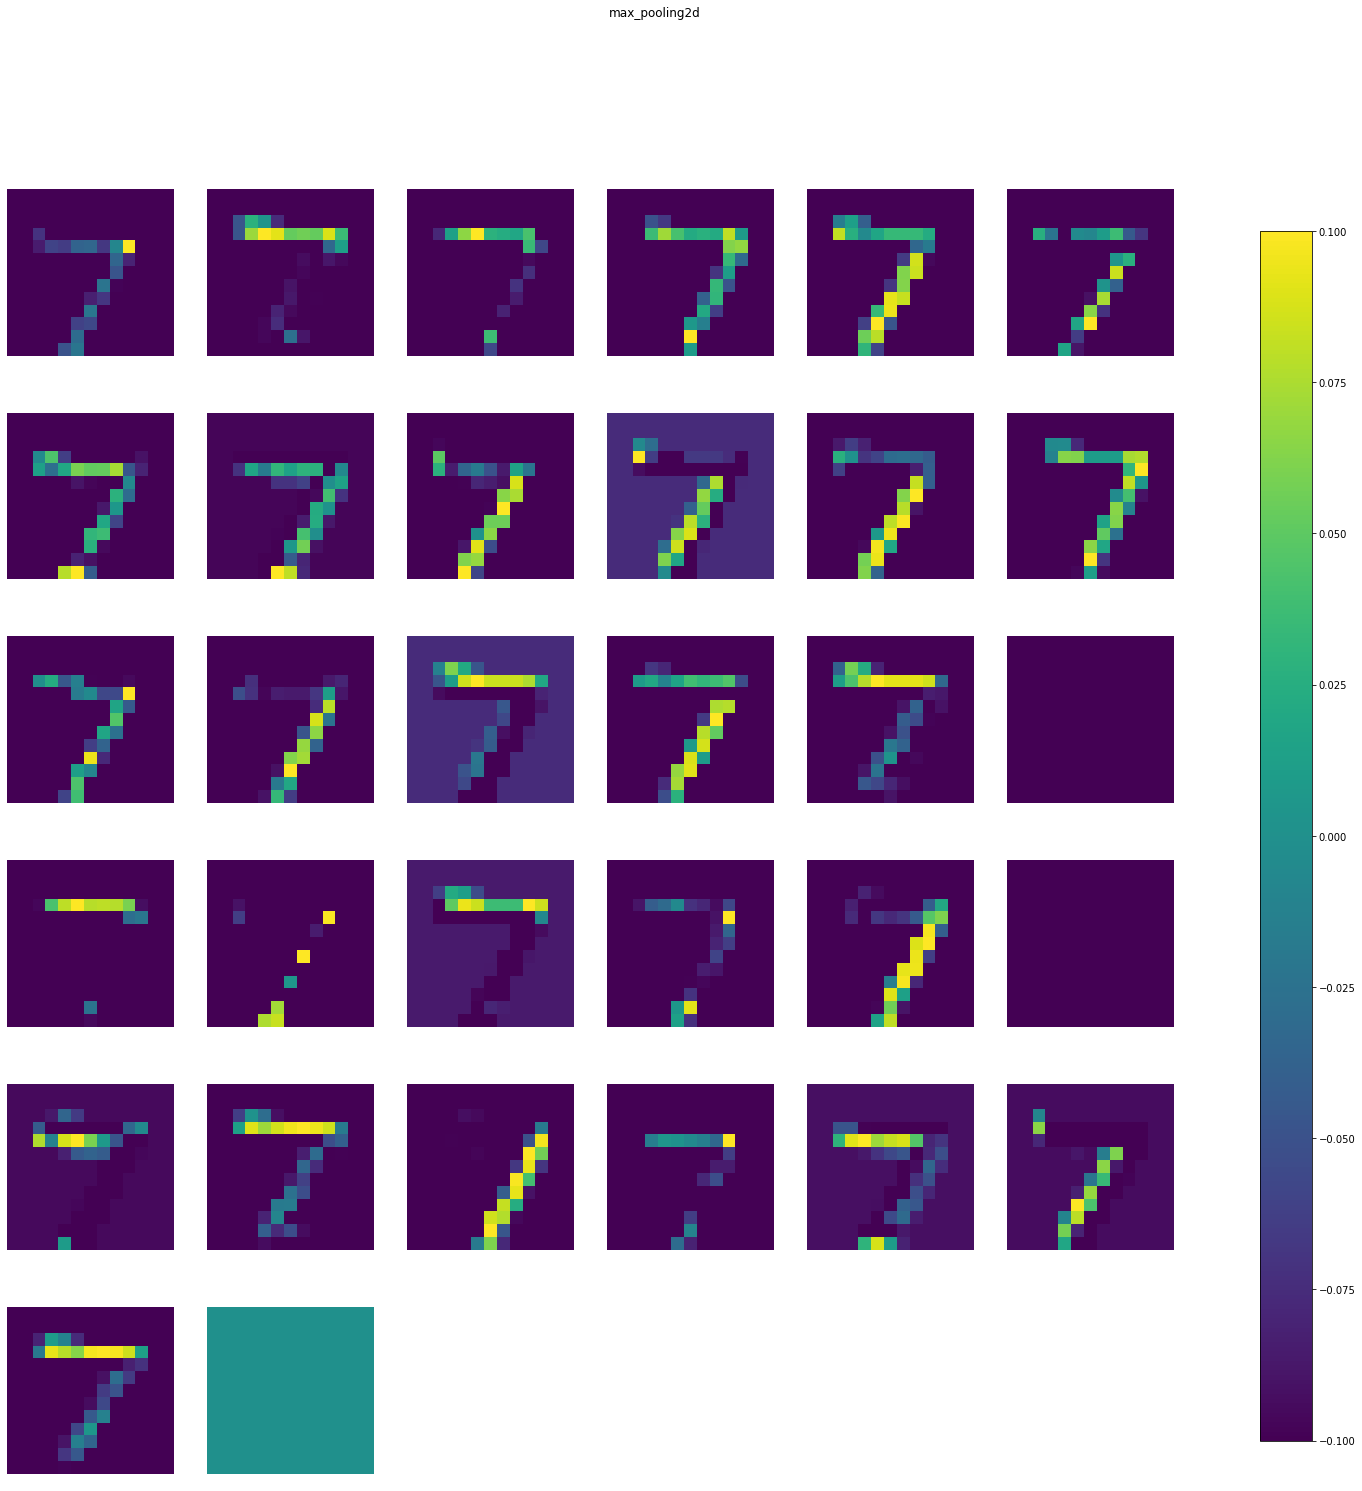

conv2d_1 (1, 11, 11, 64) 


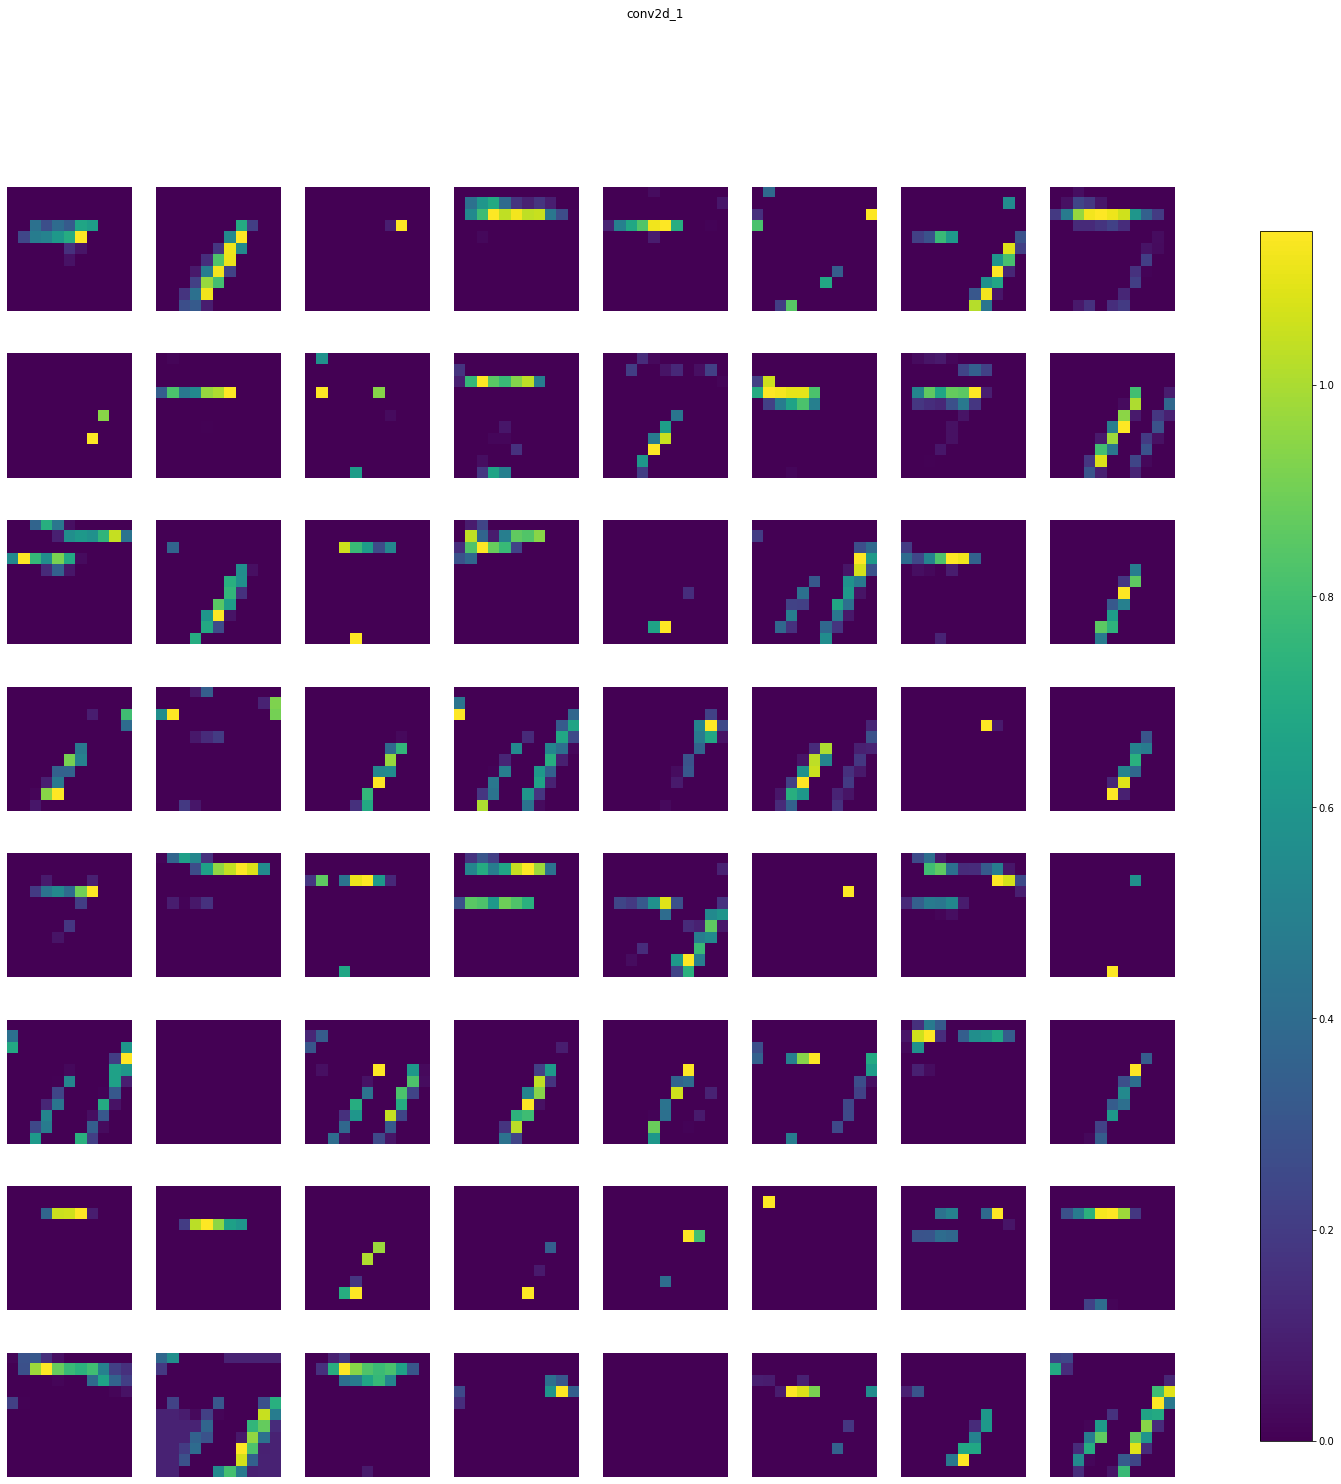

max_pooling2d_1 (1, 5, 5, 64) 


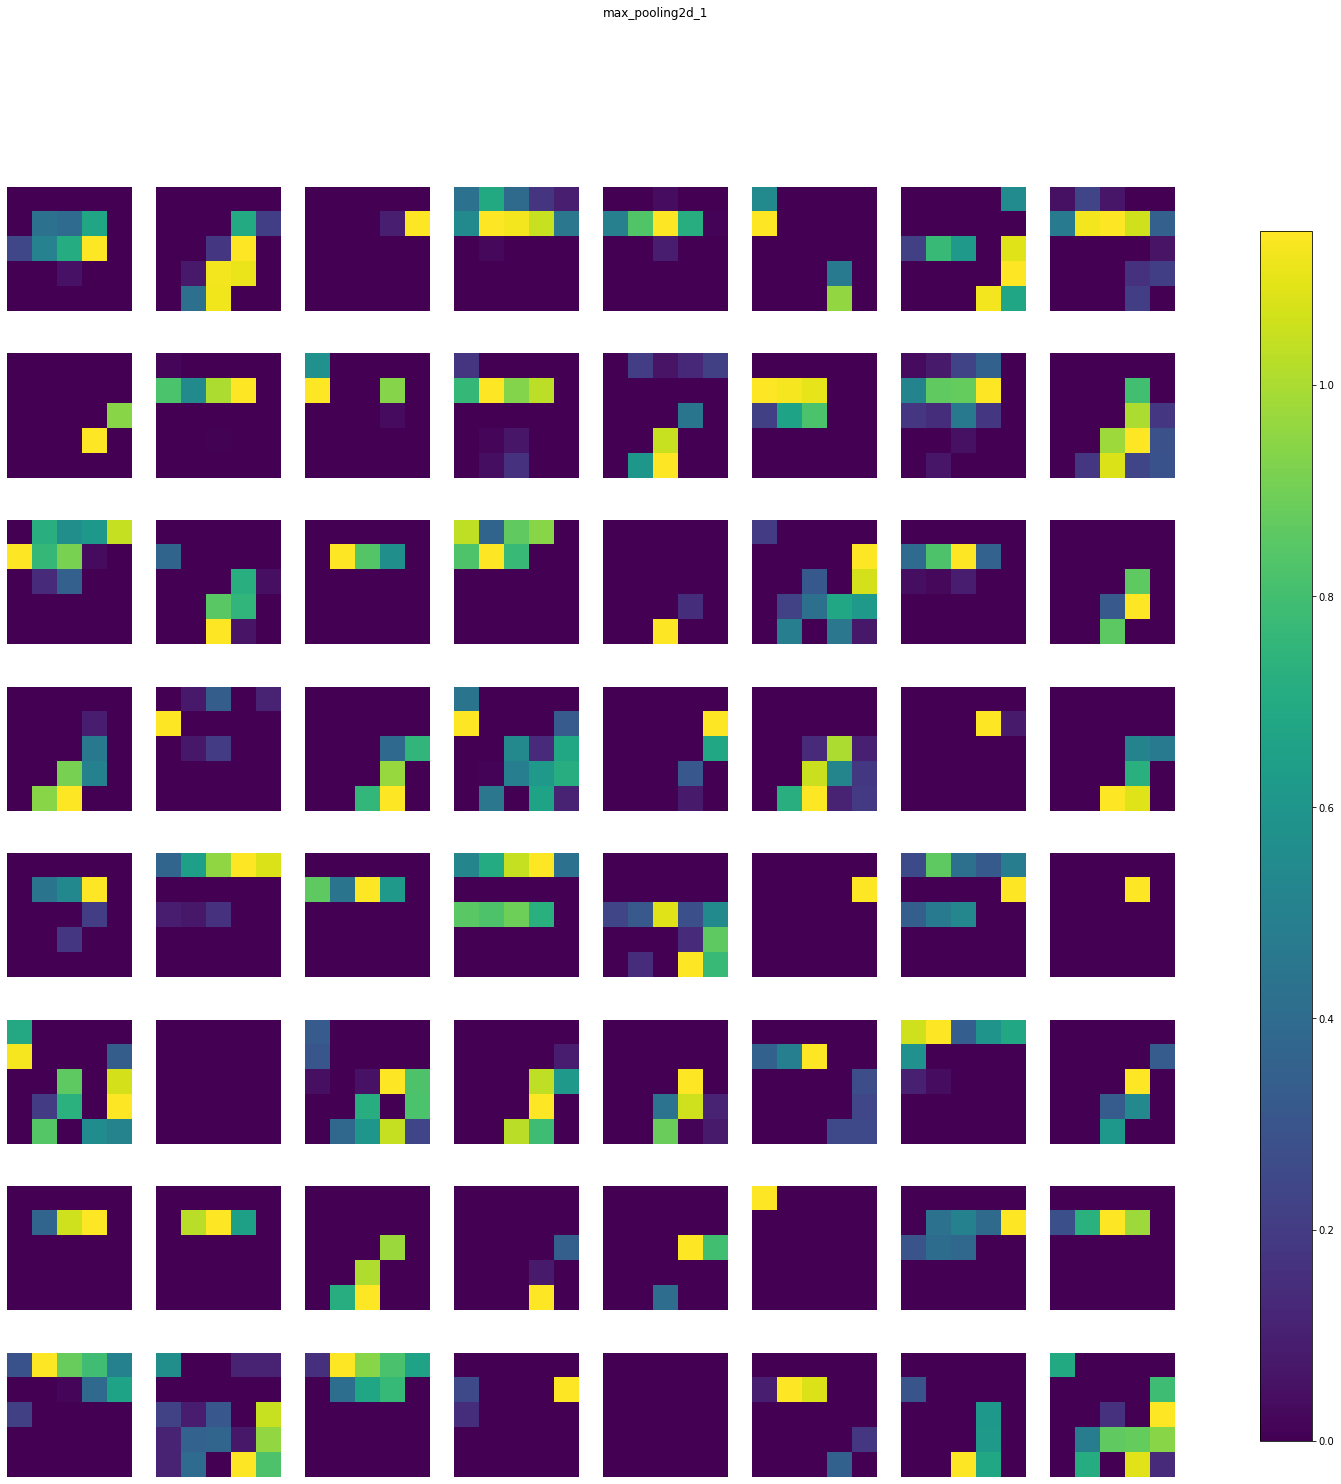

flatten (1, 1600) 


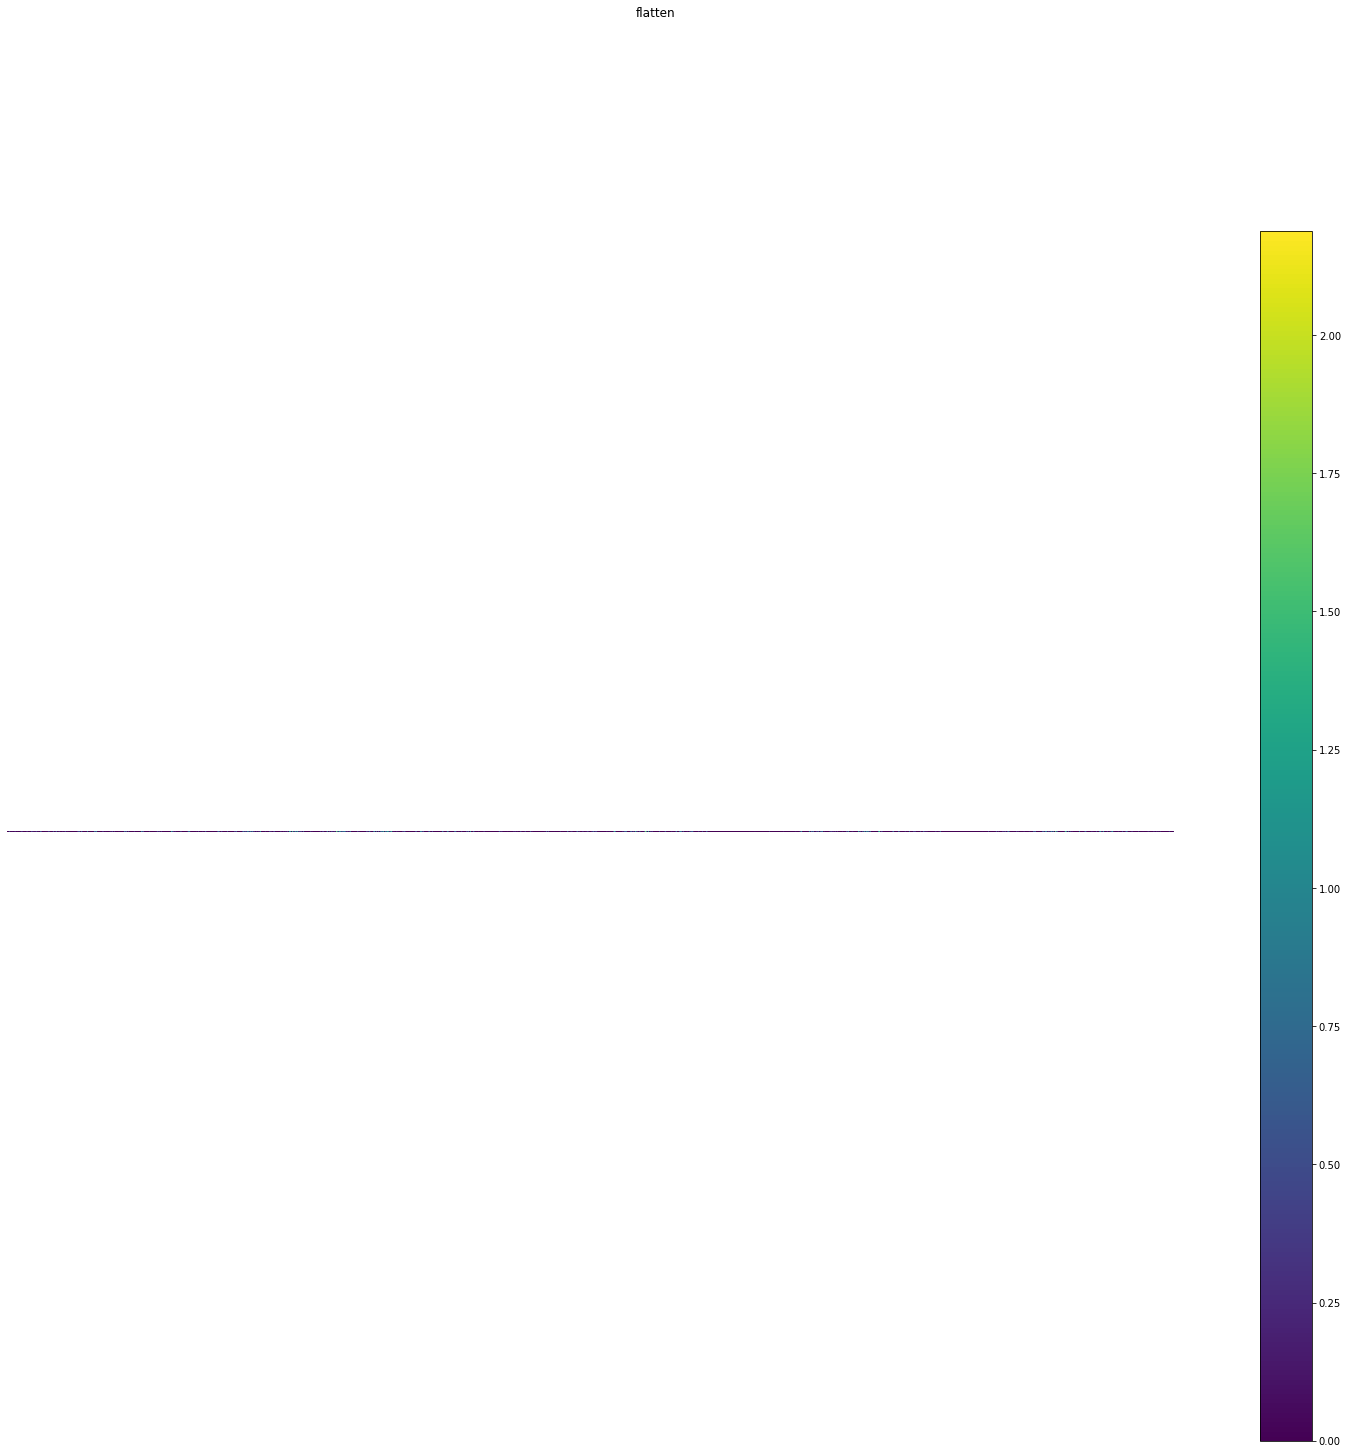

dropout (1, 1600) 


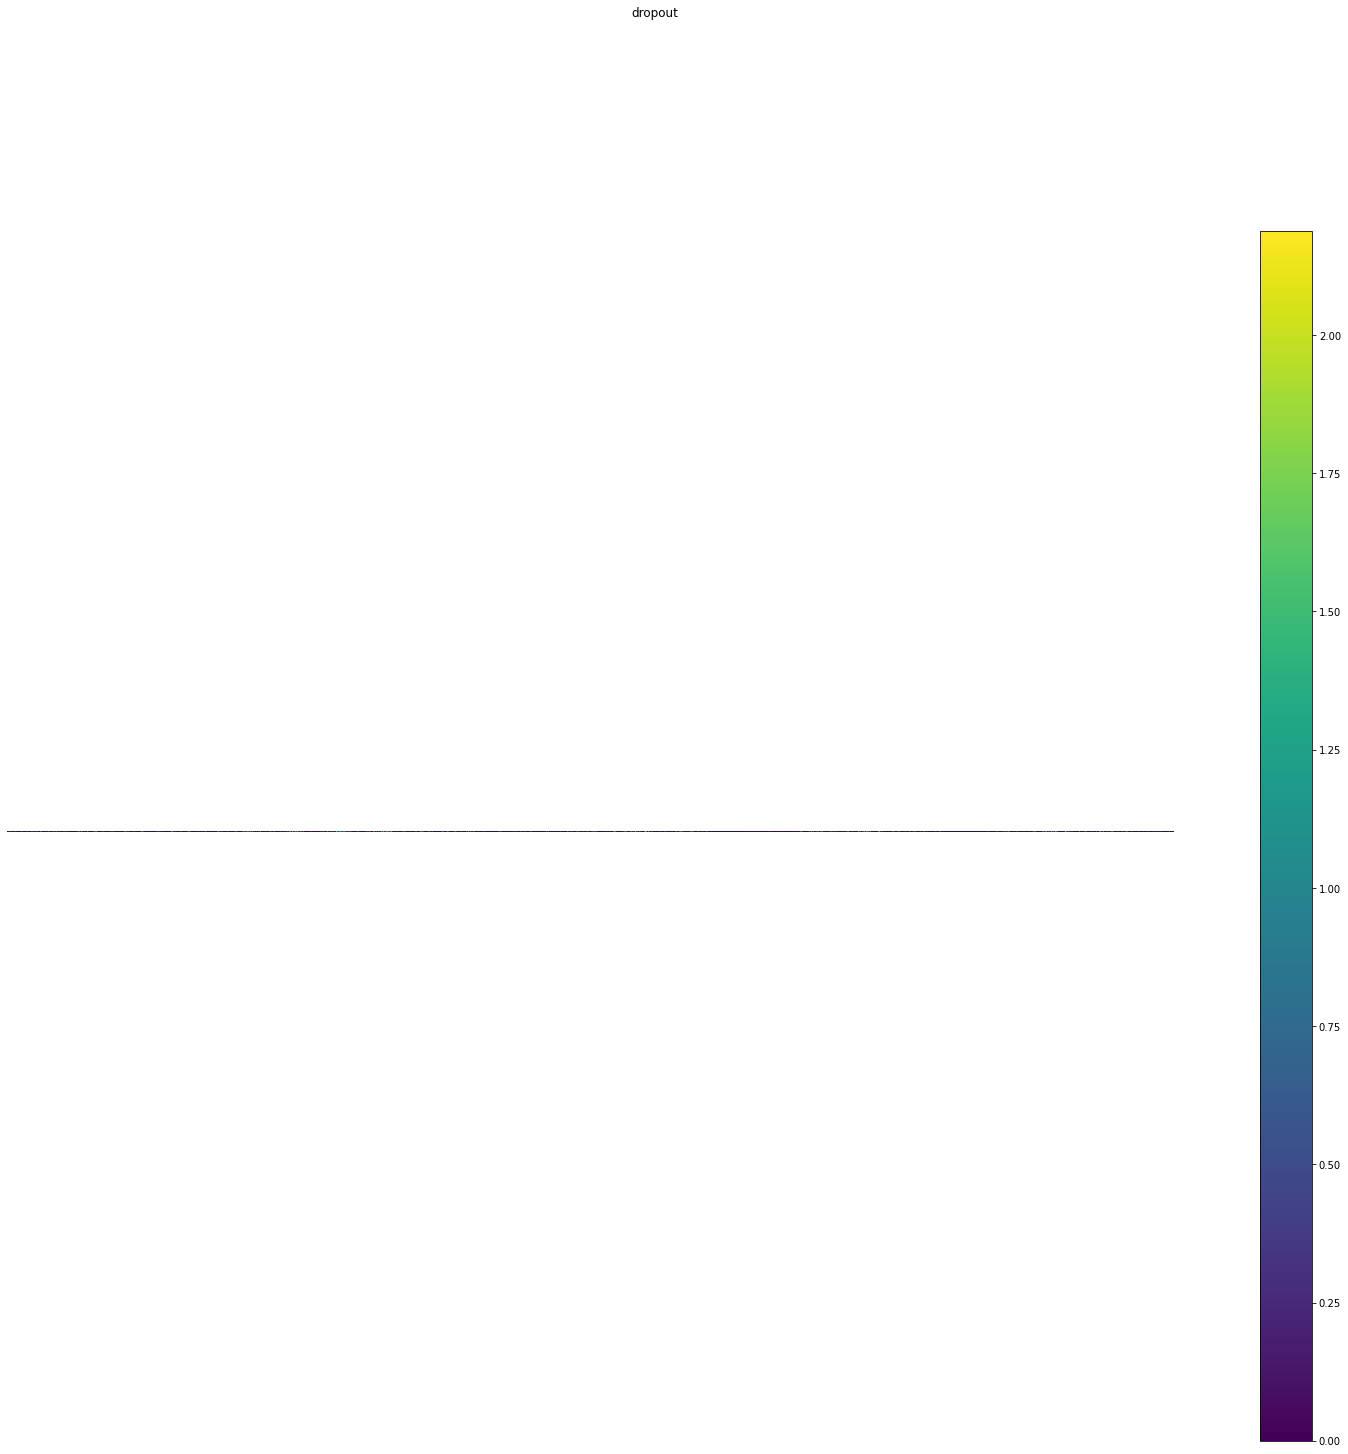

dense (1, 10) 


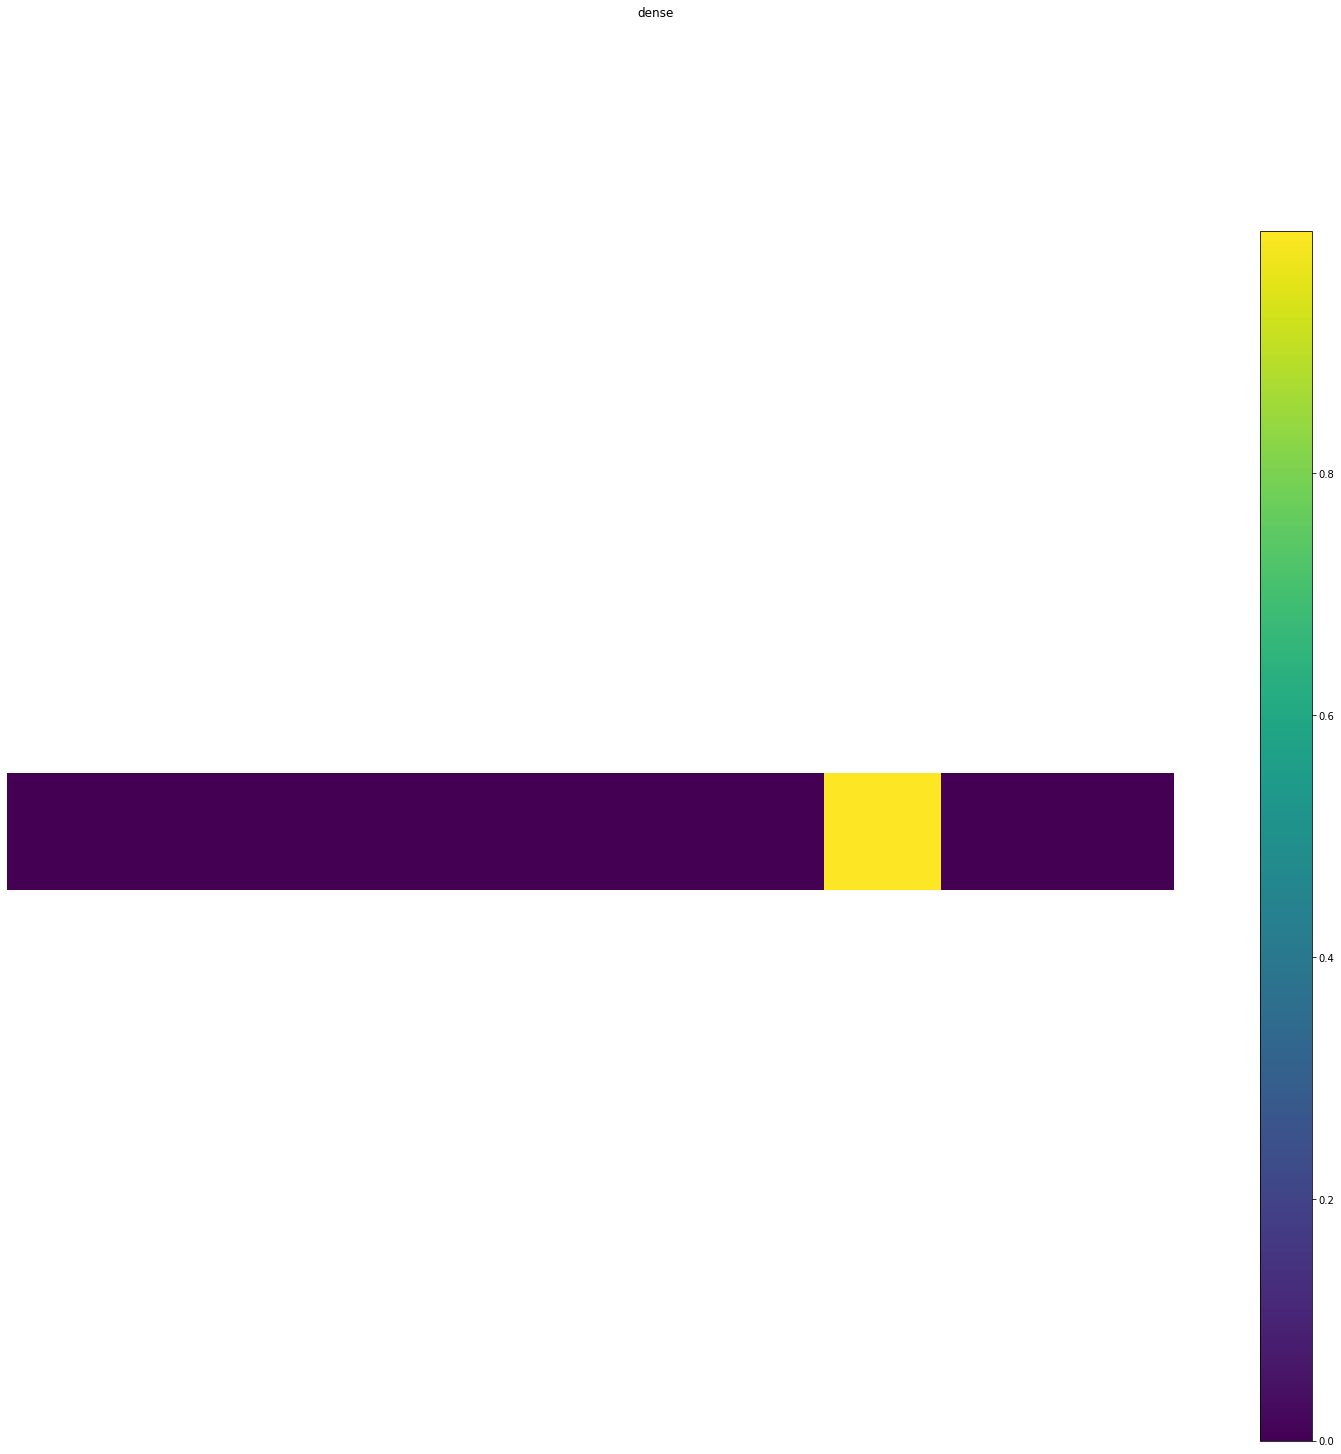

In [24]:
activations = get_activations(model5, keract_inputs)
display_activations(activations, save=False)

flatten_input (1, 28, 28, 1) 


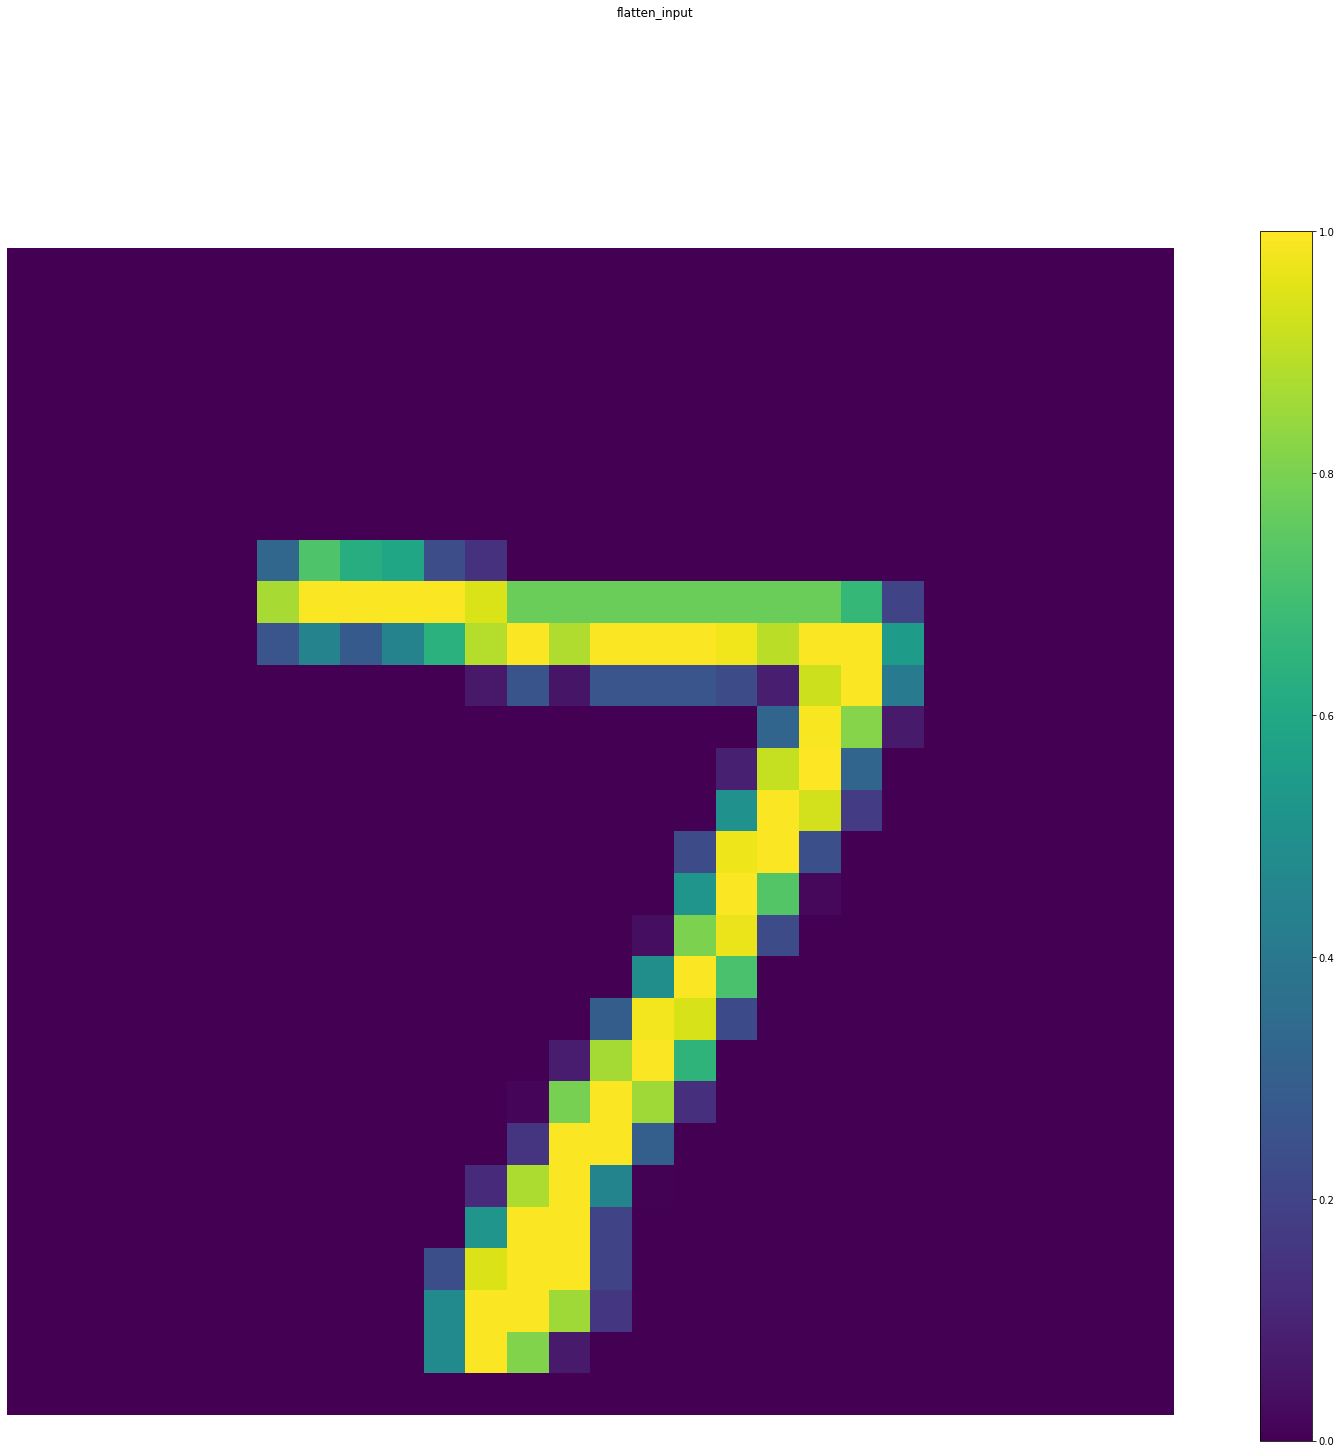

flatten (1, 784) 


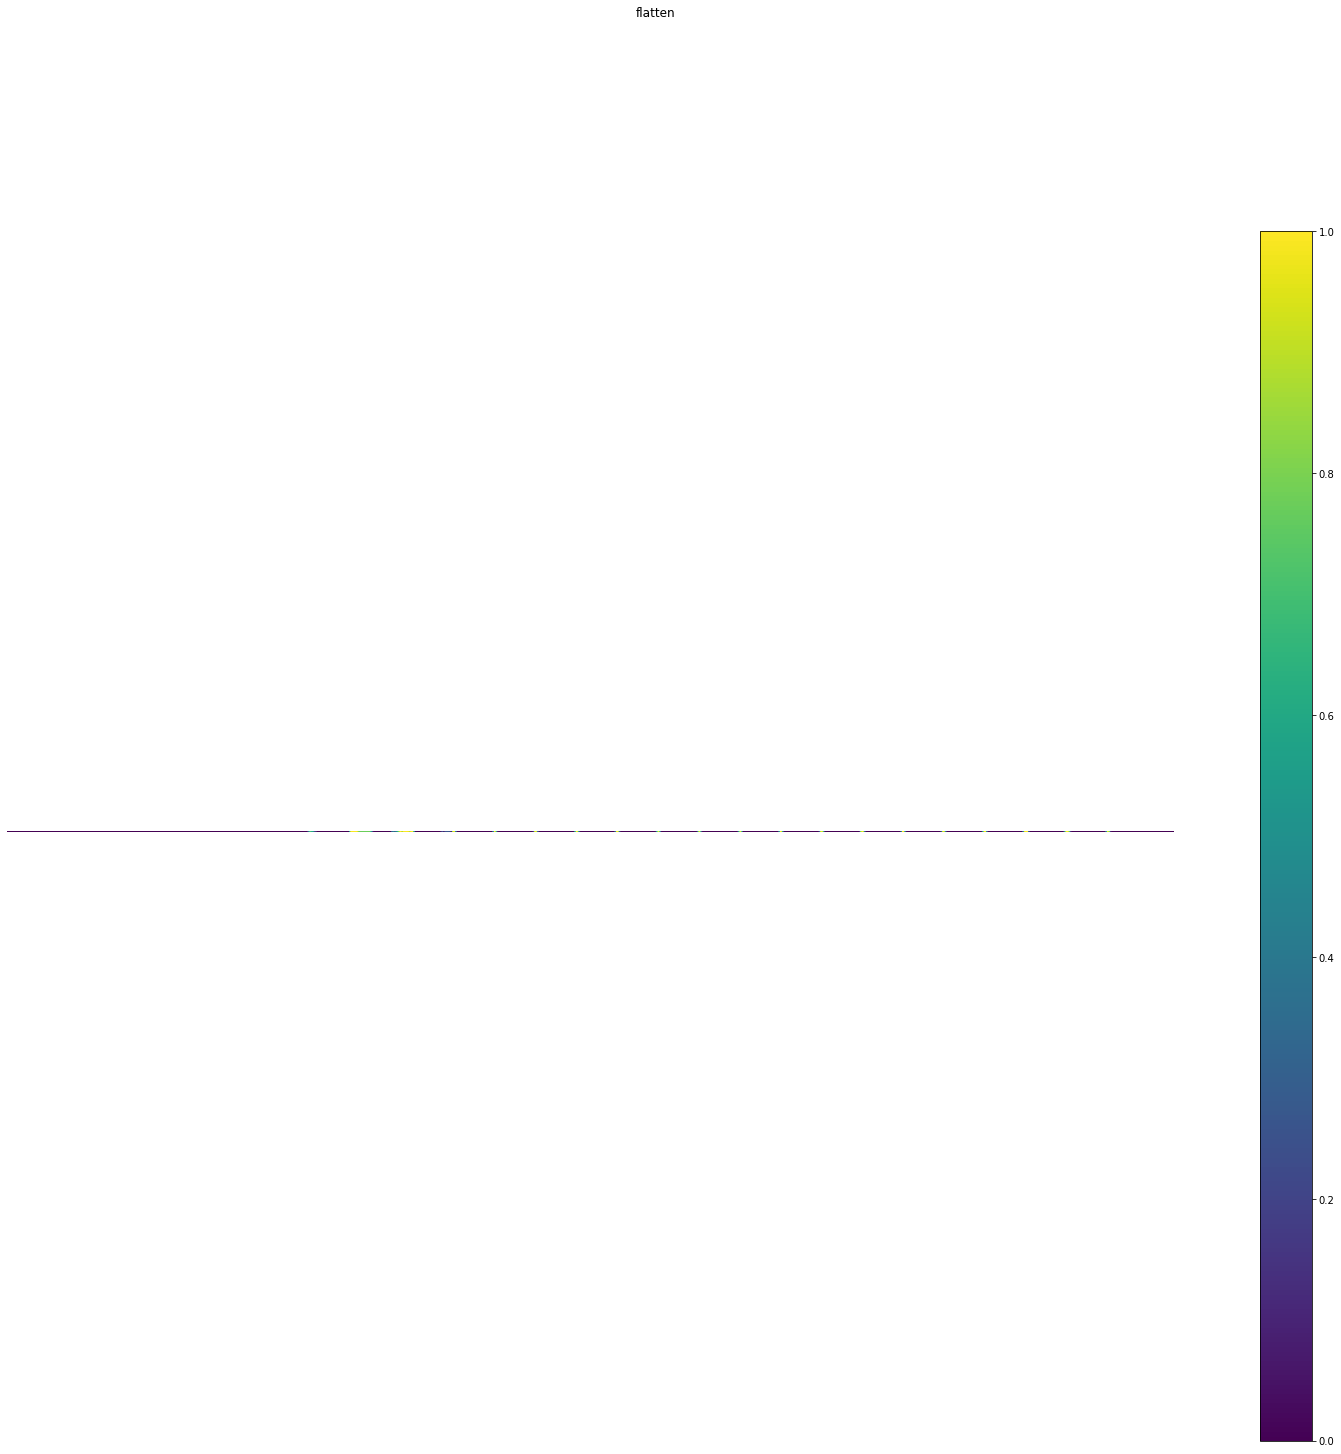

dense (1, 8) 


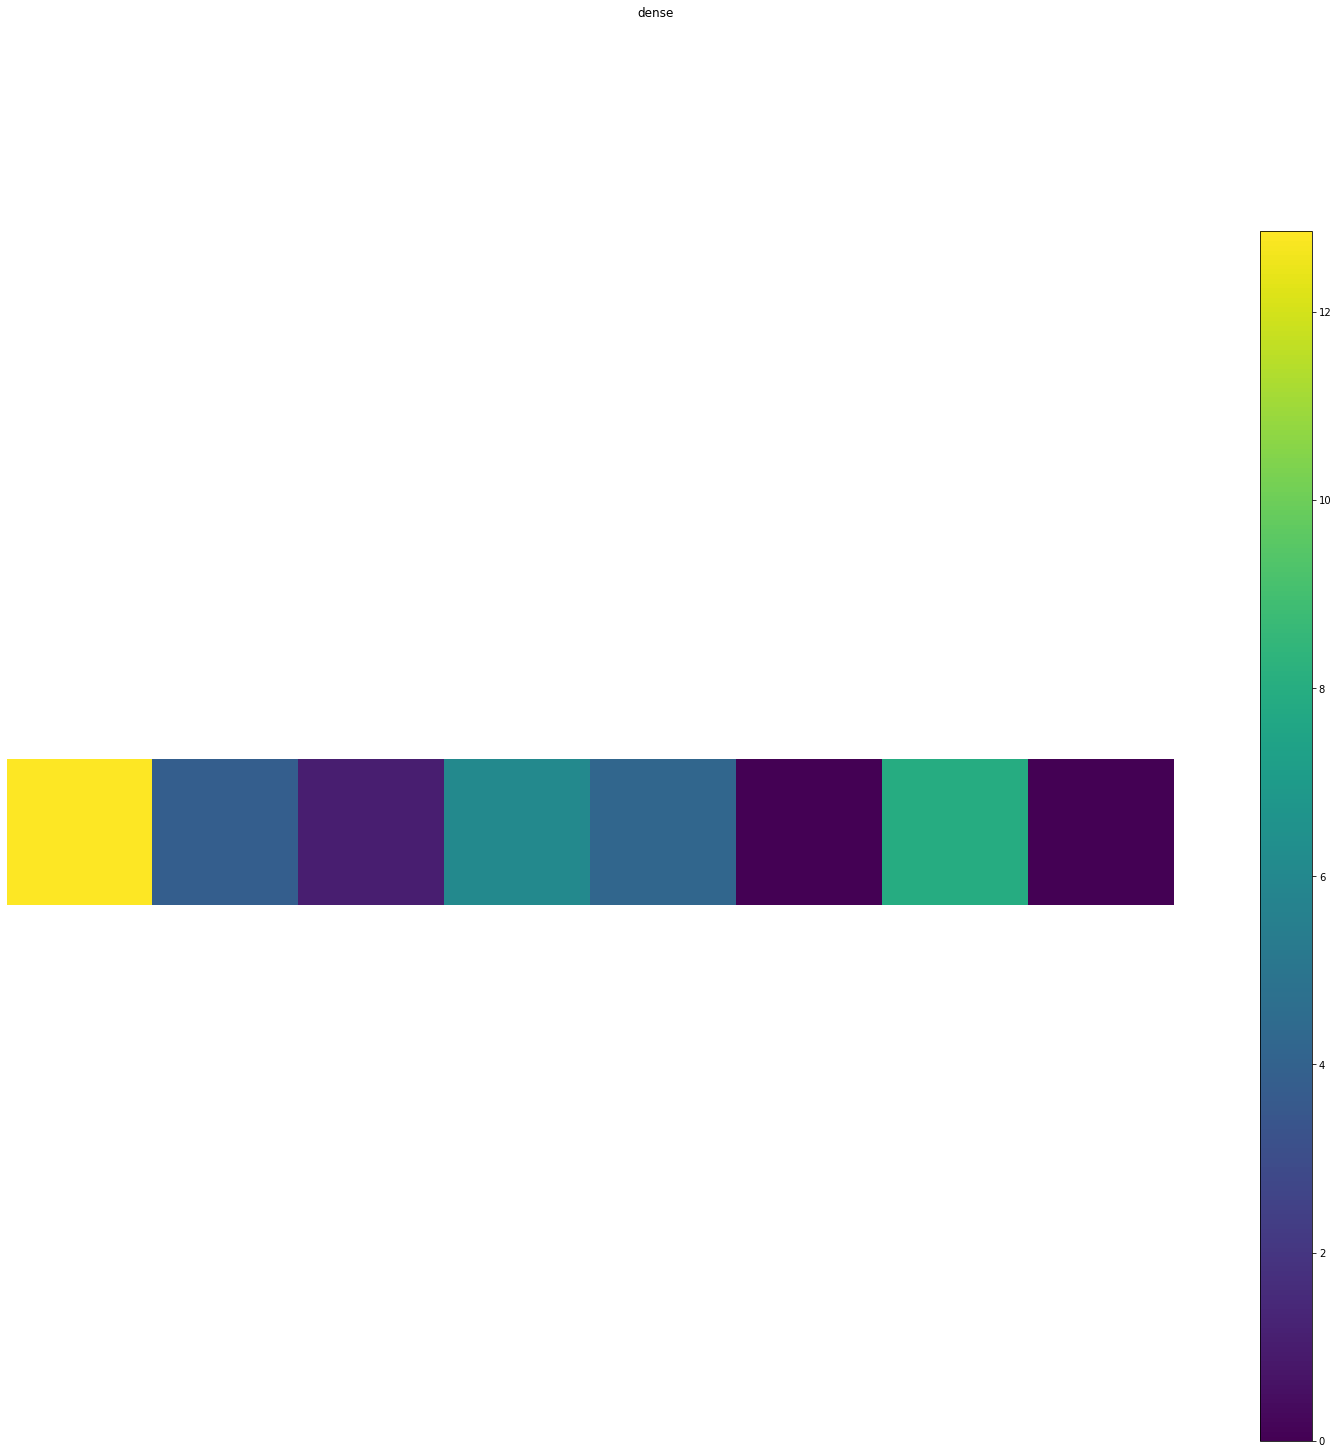

dense_1 (1, 10) 


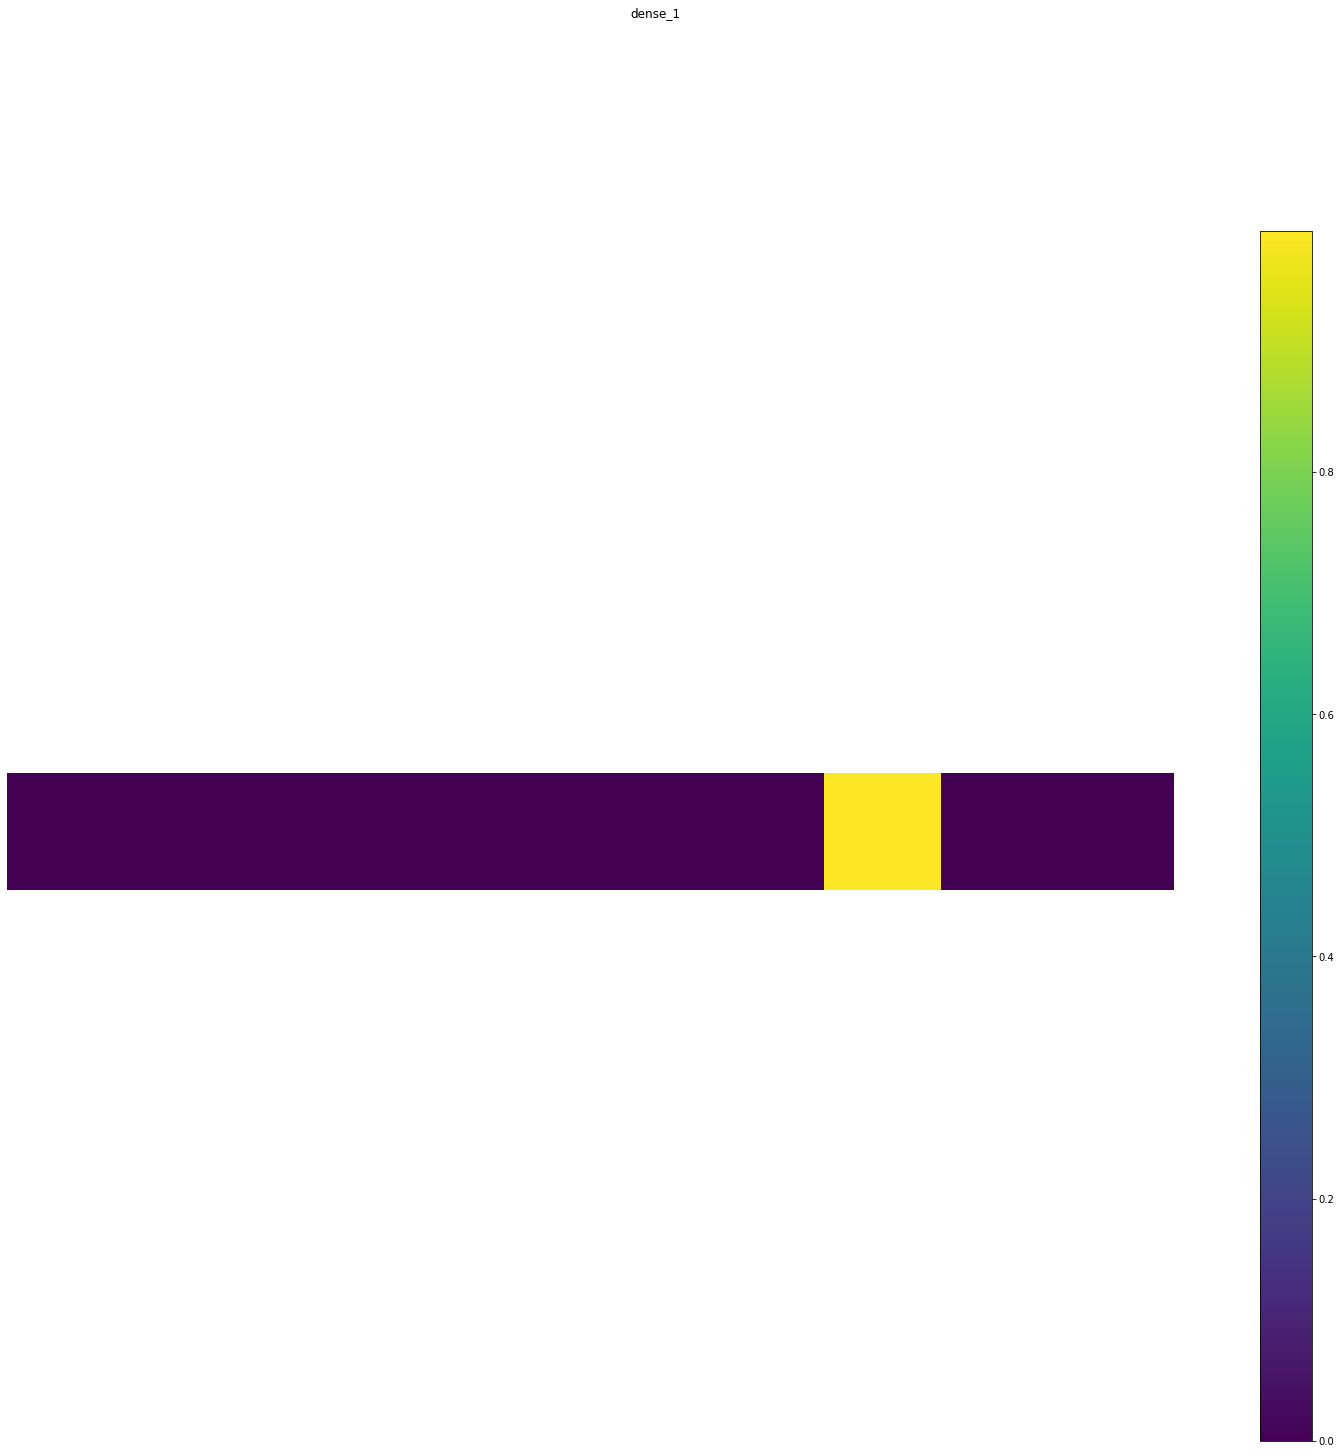

In [25]:
activations = get_activations(model_D8, keract_inputs)
display_activations(activations, save=False)

### Neural Network Visualization for Digit Recognition

https://www.kaggle.com/mommermi/mnist-neural-network-visualization


In [26]:
input_model6 = model6.input 
outputs_model6 = [layer.output for layer in model6.layers] 
functors_model6 = K.function([model6.input], outputs_model6) 

In [27]:
activations_model6 = functors_model6([x_train])

This extracts the outputs generated by each individual neuron and for each frame in the MNIST training sample and stores them on a per-layer basis.

The model is a simple two-layer multilayer perceptron with a ReLU activation and dropout (0.4) after each layer. 

In [28]:
model6.layers

#### Visualization of Individual training data

This visualises an individual frame (this is a frame taken from the training data).

In [29]:
# digit to be plotted
digit = 8

In [30]:
# activations_model6[0].shape # (48000, 256) since 48000 training samples, 28*28=784 pixels
# index 0-5 since 6 layers
# activations_model6[5][42]; print() # activations for layer index 3 for the 43rd y_train (is a 7)
# y_train[y_train==digit].shape; print() # (4691,) y_train where y_train is equal to digit
# activations_model6[1][y_train==digit][0:50][0].shape; print() # (256,) activations for layer index 1 (dense) on first 50 where y_train is equal to digit
# activations_model6[1].shape # (48000, 256)

In [31]:
%%capture
%matplotlib inline

# indices of frames to be plotted for this digit
n = range(50)

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    

def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(x_train[y_train==digit,:,:][0:50][id].reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(activations_model6[1][y_train==digit][0:50][id].reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(activations_model6[3][y_train==digit][0:50][id].reshape((8,8)), animated=True)
    output_plot = ax4.imshow(np.append(activations_model6[5][y_train==digit][0:50][id], [np.nan, np.nan]).reshape((3,4)), animated=True)
    return digit_plot, layer1_plot, layer2_plot, output_plot, 

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [32]:
ani

The panel shows from left to right: 

* The original 28x28 pixel frame 
* the output values of all neurons of the first hidden layer (each pixel stands for the output of a single neuron), 
* the output values of all neurons of the second hidden layer (each pixel stands for the output of a single neuron), and
* the output layer indicating the model classification softmax result

This is formatted as code

Dark blue pixels stand for low output values, yellow pixels stand for high output values. The pixels have been arranged in two dimensions to save space  (these layers should be thought of as a linear arrangement to stay in the typical picture of layers in a network.)

In most cases the same subset of neurons fires. This is more obvious in the second hidden layer than in the first hidden layer and can be interpreted as the first layer pre-processesing the pixel data, while the second layer deals with pattern recognition. 

In most cases the recognition of the digit shown is unambiguous; ambiguity only occurs in somewhat pathologic cases.

#### Ensemble Visualization

This checks the similarity in behavior for frames showing the same digit by looking at the ensemble properties. i.e. how the neurons behave on average for a large number of frames showing the same digit.

Cumulate the output values of each neurons for  5 < n < 100  frames with the same digit. 

The brighter a neuron, the more often it fires and the higher its output value and hence also its impact on the overall classification.

Also sum up the pixel values in the original frames for comparison.

In [33]:
%%capture
%matplotlib inline

# numbers of frames to be summed over
n = np.append([1], np.linspace(5, 100, 20, dtype=int))

# initialize plots
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15,4))

# add a counter indicating the number of frames used in the summation
counter = ax1.text(1, 2, 'n={}'.format(0), color='white', fontsize=16, animated=True)

# prepare plots
ax1.set_title('Input Layer', fontsize=16)
ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Hidden Layer 1', fontsize=16)
ax2.axes.get_xaxis().set_visible(False)
ax2.axes.get_yaxis().set_visible(False)

ax3.set_title('Hidden Layer 2', fontsize=16)
ax3.axes.get_xaxis().set_visible(False)
ax3.axes.get_yaxis().set_visible(False)

ax4.set_title('Output Layer', fontsize=16)
ax4.axes.get_xaxis().set_visible(False)
ax4.axes.get_yaxis().set_visible(False)   

# add numbers to the output layer plot to indicate label
for i in range(3):
    for j in range(4):
        text = ax4.text(j, i, [[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, '', '']][i][j],
                        ha="center", va="center", color="w", fontsize=16)    

def animate(id):
    # plot elements that are changed in the animation
    digit_plot = ax1.imshow(np.sum(x_train[y_train==digit,:,:][0:50][:id], axis=0).reshape((28,28)), animated=True)
    layer1_plot = ax2.imshow(np.sum(activations_model6[1][y_train==digit][0:50][:id], axis=0).reshape((16,16)), animated=True)
    layer2_plot = ax3.imshow(np.sum(activations_model6[3][y_train==digit][0:50][:id], axis=0).reshape((8,8)), animated=True)
    output_plot = ax4.imshow(np.append(np.sum(activations_model6[5][y_train==digit][0:50][:id], axis=0), [np.nan, np.nan]).reshape((3,4)), animated=True)
    counter.set_text('n={}'.format(id))
    return digit_plot, layer1_plot, layer2_plot, output_plot, counter,

# define animation
ani = matplotlib.animation.FuncAnimation(f, animate, frames=n, interval=100)

In [34]:
ani

After summing up the responses of as little as 20-30 frames, the pattern in the second hidden layer is almost static. After combining about 70-80 frames, also the pattern in the first hidden layer also appears static. 

This supports the idea that only a subset of all neurons is involved in the recognition of individual digits.

#### Comparison of Layers for Different Digits

Compare the static patterns that emerge in the hidden layers for the different labels.

First Hidden Layer

Text(0.5, 1.0, '- 0 -')

Text(0.5, 1.0, '- 1 -')

Text(0.5, 1.0, '- 2 -')

Text(0.5, 1.0, '- 3 -')

Text(0.5, 1.0, '- 4 -')

Text(0.5, 1.0, '- 5 -')

Text(0.5, 1.0, '- 6 -')

Text(0.5, 1.0, '- 7 -')

Text(0.5, 1.0, '- 8 -')

Text(0.5, 1.0, '- 9 -')

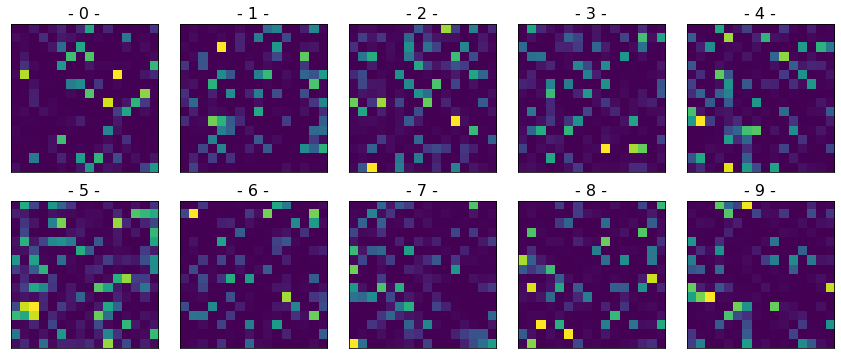

In [35]:
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for i, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if i <= 10:
        ax.set_title('- {} -'.format(i), fontsize=16)
        layer1_plot = ax.imshow(np.sum(activations_model6[1][y_train==i] , axis=0).reshape((16,16))) 

These patterns look sufficiently random - except for the digits 4 and 9, which look remarkably similar. 
This makes sense as the hand-written digits themselves strongly resemble each other in the writing style used in the US, on which the MNIST dataset is based.

Next quantify the similarities between the normalized static first-hidden layer patterns for pairs of digits by multiplication and summation over these patterns.

In [39]:
activations_model6[1].shape

(48000, 256)

In [40]:
np.sqrt(np.sum(activations_model6[1][y_train==0], axis=0)/np.sum(activations_model6[1][y_train==0]))

array([0.00340245, 0.01382381, 0.05480603, 0.00937994, 0.04432826,
       0.06982651, 0.01985452, 0.07526828, 0.17633097, 0.00118024,
       0.07367511, 0.0052156 , 0.        , 0.01500245, 0.        ,
       0.08862109, 0.04234762, 0.02559653, 0.0031844 , 0.08141519,
       0.00252055, 0.05885044, 0.05043676, 0.02879992, 0.01319135,
       0.02669881, 0.00240867, 0.00599543, 0.1426162 , 0.01223257,
       0.0287715 , 0.01219972, 0.00277957, 0.03032637, 0.00414501,
       0.01582178, 0.05683004, 0.13429609, 0.00223373, 0.17578754,
       0.01899718, 0.00642372, 0.00155939, 0.01027841, 0.04719018,
       0.00135228, 0.04018862, 0.01537856, 0.00560323, 0.05519271,
       0.0047911 , 0.        , 0.00574452, 0.        , 0.18978503,
       0.01012095, 0.19396299, 0.00590836, 0.00537147, 0.01357578,
       0.00208251, 0.01519097, 0.        , 0.03677923, 0.        ,
       0.08601911, 0.03324258, 0.00992431, 0.0199828 , 0.16627195,
       0.00454021, 0.01041621, 0.05862658, 0.03020269, 0.03151

In [38]:
similarity_layer1 = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        sum_i_normalized = np.sqrt(np.sum(activations_model6[1][y_train==i], axis=0)/np.sum(activations_model6[1][y_train==i]))
        sum_j_normalized = np.sqrt(np.sum(activations_model6[1][y_train==j], axis=0)/np.sum(activations_model6[1][y_train==j]))
        similarity_layer1[i,j] = np.sum(sum_i_normalized*sum_j_normalized)

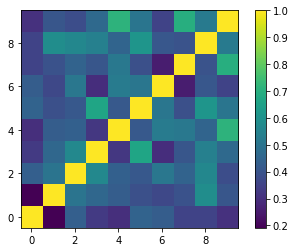

In [ ]:
f, ax = plt.subplots()

similarity_layer1_plot = ax.imshow(similarity_layer1, origin='lower')
plt.colorbar(similarity_layer1_plot)

This matrix shows the similarity of the static pattern in the first hidden layer for the different labels. 

There are cases that show high levels of similarity. These cases include the digits 3 and 5, 7 and 9, as well as 4 and 9. Indeed, all of these digits show some level of similarity when written down, depending on your writing style.

Second Hidden Layer

Text(0.5, 1.0, '- 0 -')

Text(0.5, 1.0, '- 1 -')

Text(0.5, 1.0, '- 2 -')

Text(0.5, 1.0, '- 3 -')

Text(0.5, 1.0, '- 4 -')

Text(0.5, 1.0, '- 5 -')

Text(0.5, 1.0, '- 6 -')

Text(0.5, 1.0, '- 7 -')

Text(0.5, 1.0, '- 8 -')

Text(0.5, 1.0, '- 9 -')

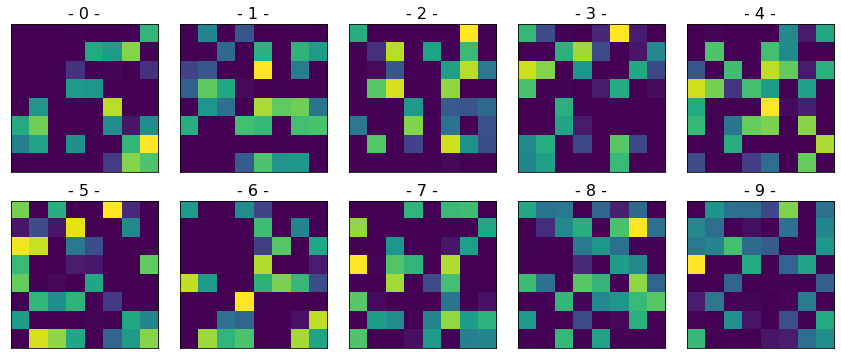

In [ ]:
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for i, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if i <= 10:
        ax.set_title('- {} -'.format(i), fontsize=16)
        layer2_plot = ax.imshow(np.sum(activations_model6[3][y_train==i] , axis=0).reshape((8,8))) 

Patterns for the digit combinations that showed a high level of similarity in the first hidden layer (3 & 5, 7 & 9, 4 & 9) do not seem to show the same level of similarity in the second hidden layer.

This second hidden layer is not based on the pixel values directly as it takes outputs from hidden layer 1 as input. Hence, it is much harder to interpret the patterns shown here as they are based on patterns found in the first hidden layer.

In [ ]:
similarity_layer2 = np.zeros((10,10))

for i in range(10):
    for j in range(10):
        sum_i_normalized = np.sqrt(np.sum(activations_model6[3][y_train==i], axis=0)/np.sum(activations_model6[3][y_train==i]))
        sum_j_normalized = np.sqrt(np.sum(activations_model6[3][y_train==j], axis=0)/np.sum(activations_model6[3][y_train==j]))
        similarity_layer2[i,j] = np.sum(sum_i_normalized*sum_j_normalized)

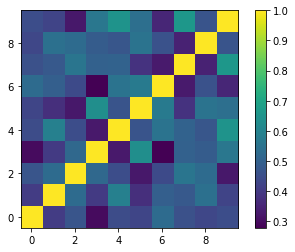

In [ ]:
f, ax = plt.subplots()

similarity_layer2_plot = ax.imshow(similarity_layer2, origin='lower')
plt.colorbar(similarity_layer2_plot)

This reduced similarity is reflected by the much smoother similarity matrix. It has fewer digit combinations that stick out with elevated similarities.

Despite variations in the shapes of hand-written digits, the same groups of neurons are involved in the identification of the same digits.
Similarities in the shapes of digits translate to similarities in the groups of neurons that are involved in their identification in the first hidden layer, but not so much in the second hidden layer.

Output Layer

Text(0.5, 1.0, '- 0 -')

Text(0.5, 1.0, '- 1 -')

Text(0.5, 1.0, '- 2 -')

Text(0.5, 1.0, '- 3 -')

Text(0.5, 1.0, '- 4 -')

Text(0.5, 1.0, '- 5 -')

Text(0.5, 1.0, '- 6 -')

Text(0.5, 1.0, '- 7 -')

Text(0.5, 1.0, '- 8 -')

Text(0.5, 1.0, '- 9 -')

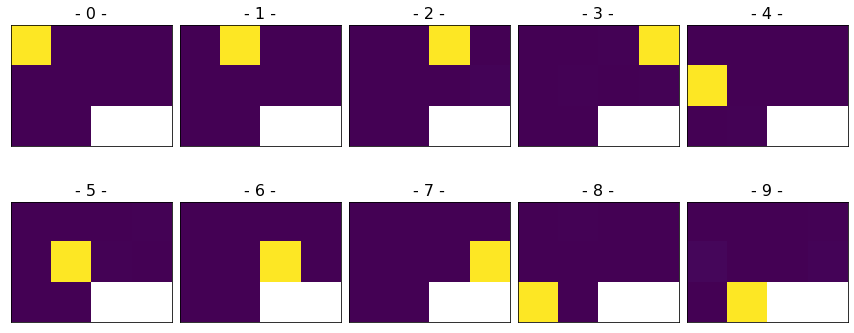

In [ ]:
f, ax_arr = plt.subplots(2, 5, figsize=(15,10))

f.subplots_adjust(wspace=0.05, bottom=0.5, top=0.95)

for i, ax in enumerate(np.ravel(ax_arr)):
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if i <= 10:
        ax.set_title('- {} -'.format(i), fontsize=16)
        output_plot = ax.imshow(np.append(np.sum(activations_model6[5][y_train==i] , axis=0), [np.nan, np.nan]).reshape((3,4))) 

### Understanding Convolutional Neural Networks (CNNs) using Visualisation

https://www.analyticsvidhya.com/blog/2019/05/understanding-visualizing-neural-networks/ 

#### Accessing Individual Layers

It’s easy to access the individual layers of a Keras model and extract the parameters associated with each layer. 
This includes the layer weights, the number of filters etc.

Now, we will create dictionaries that map the layer name to its corresponding characteristics and layer weights:

In [ ]:
#creating a mapping of layer name ot layer details 
#we will create a dictionary layers_info which maps a layer name to its charcteristics
layers_info = {}
for i in model5.layers:
    layers_info[i.name] = i.get_config()

#here the layer_weights dictionary will map every layer_name to its corresponding weights
layer_weights = {}
for i in model5.layers:
    layer_weights[i.name] = i.get_weights()

print(layers_info['conv2d_2'])

{'name': 'conv2d_2', 'trainable': True, 'dtype': 'float32', 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}


Above gives the output of different parameters of the conv2d_2 layer. 

https://www.analyticsvidhya.com/blog/2019/05/understanding-visualizing-neural-networks/ 
Also shows:
* Activation Maximization – Visualizing what a Model Expects
* Occlusion Maps – Visualizing what’s important in the Input
* Saliency Maps – Visualizing the Contribution of Input Features
* Class Activation Maps
* Layerwise Output Visualization – Visualizing the Process

### HiddenLayers

https://github.com/waleedka/hiddenlayer/

Can't get to work with tensorflow 2